# Problem Set 6: Trees and Forests


## Part 1: Exploring The Titanic

Your mission for this problem set is to use your knowledge of supervised machine learning to try to predict which passengers aboard the Titanic were most likely to survive. The prompts for this part of the problem set are deliberately vague - the goal is to leave it up to you how to structure (most of) your analysis. We **highly recommend** you closely go over the entire problem set once before starting; this is important, so that you understand the sequence of steps and not perform redundant work.

To get started, read about the prediction problem on [Kaggle](https://www.kaggle.com/c/titanic). Then, download the data [here](https://www.kaggle.com/c/titanic/data) - you'll need the `train.csv` data. Treat this as your entire dataset, and further build train and test splits from this dataset whenever required. 

### 1.1 Exploratory data analysis

Create 2-3 figures and tables that help give you a feel for the data. Make sure to at least check the data type of each variable, to understand which variables have missing observations, and to understand the distribution of each variable (and determine whether the variables should be normalized or not). Are any of the potential predictor variables (i.e., anything execpt for survival) collinear or highly correlated? Remember that this is the EDA phase, and we want to save pre-processing steps like imputations, transformations etc. and feature engineering for later.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from  sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
import IPython
import graphviz 

In [79]:
pd.set_option('display.max_rows', None)

In [157]:
#import dataset
df_main = pd.read_csv('train.csv')
df_main

PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
5              6         0       3   
6              7         0       1   
7              8         0       3   
8              9         1       3   
9             10         1       2   
10            11         1       3   
11            12         1       1   
12            13         0       3   
13            14         0       3   
14            15         0       3   
15            16         1       2   
16            17         0       3   
17            18         1       2   
18            19         0       3   
19            20         1       3   
20            21         0       2   
21            22         1       2   
22            23         1       3   
23            24         1       1   
24            25         0       3   
25            26         1       3   
26            27         0       3   
27            28         0       1   
28            29         1       3   
29            30         0       3   
30            31         0       1   
31            32         1       1   
32            33         1       3   
33            34         0       2   
34            35         0       1   
35            36         0       1   
36            37         1       3   
37            38         0       3   
38            39         0       3   
39            40         1       3   
40            41         0       3   
41            42         0       2   
42            43         0       3   
43            44         1       2   
44            45         1       3   
45            46         0       3   
46            47         0       3   
47            48         1       3   
48            49         0       3   
49            50         0       3   
50            51         0       3   
51            52         0       3   
52            53         1       1   
53            54         1       2   
54            55         0       1   
55            56         1       1   
56            57         1       2   
57            58         0       3   
58            59         1       2   
59            60         0       3   
60            61         0       3   
61            62         1       1   
62            63         0       1   
63            64         0       3   
64            65         0       1   
65            66         1       3   
66            67         1       2   
67            68         0       3   
68            69         1       3   
69            70         0       3   
70            71         0       2   
71            72         0       3   
72            73         0       2   
73            74         0       3   
74            75         1       3   
75            76         0       3   
76            77         0       3   
77            78         0       3   
78            79         1       2   
79            80         1       3   
80            81         0       3   
81            82         1       3   
82            83         1       3   
83            84         0       1   
84            85         1       2   
85            86         1       3   
86            87         0       3   
87            88         0       3   
88            89         1       1   
89            90         0       3   
90            91         0       3   
91            92         0       3   
92            93         0       1   
93            94         0       3   
94            95         0       3   
95            96         0       3   
96            97         0       1   
97            98         1       1   
98            99         1       2   
99           100         0       2   
100          101         0       3   
101          102         0       3   
102          103         0       1   
103          104         0       3   
104          10

### Data Type

In [158]:
df_main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### Missing Value and distribution Observation

In [4]:
#total number of missing values 
df_main.isnull().sum().sum()

866

In [5]:
#columns that have missing values
df_main.columns[df_main.isnull().any()]

Index(['Age', 'Cabin', 'Embarked'], dtype='object')

In [80]:
#check the duplicat value
df_main.duplicated(subset=['Name'])

0      False
1      False
2      False
3      False
4      False
5      False
6      False
7      False
8      False
9      False
10     False
11     False
12     False
13     False
14     False
15     False
16     False
17     False
18     False
19     False
20     False
21     False
22     False
23     False
24     False
25     False
26     False
27     False
28     False
29     False
30     False
31     False
32     False
33     False
34     False
35     False
36     False
37     False
38     False
39     False
40     False
41     False
42     False
43     False
44     False
45     False
46     False
47     False
48     False
49     False
50     False
51     False
52     False
53     False
54     False
55     False
56     False
57     False
58     False
59     False
60     False
61     False
62     False
63     False
64     False
65     False
66     False
67     False
68     False
69     False
70     False
71     False
72     False
73     False
74     False
75     False
76     False

### Visualizations

In [6]:
pd.unique(df_main['Cabin'])

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [59]:
pd.unique(df_full['Embarked'])

array(['S', 'C', 'Q'], dtype=object)

In [174]:
df_main.pivot_table(index= [ 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp',
       'Parch'], aggfunc='size')

Survived  Pclass  Sex     Age    SibSp  Parch
0         1       female  2.00   1      2         1
                          25.00  1      2         1
                          50.00  0      0         1
                  male    18.00  1      0         1
                          19.00  1      0         1
                                 3      2         1
                          21.00  0      1         1
                          22.00  0      0         1
                          24.00  0      0         1
                                        1         1
                          27.00  0      2         1
                          28.00  0      0         1
                                 1      0         1
                          29.00  0      0         1
                                 1      0         1
                          30.00  0      0         1
                          31.00  0      0         1
                                 1      0         1
                  

- less male survived in each class, however higher class has noticebaly more surviver comparing to the lower classes 
- most of the survivor are young, especially in the lower class

In [10]:
import seaborn
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

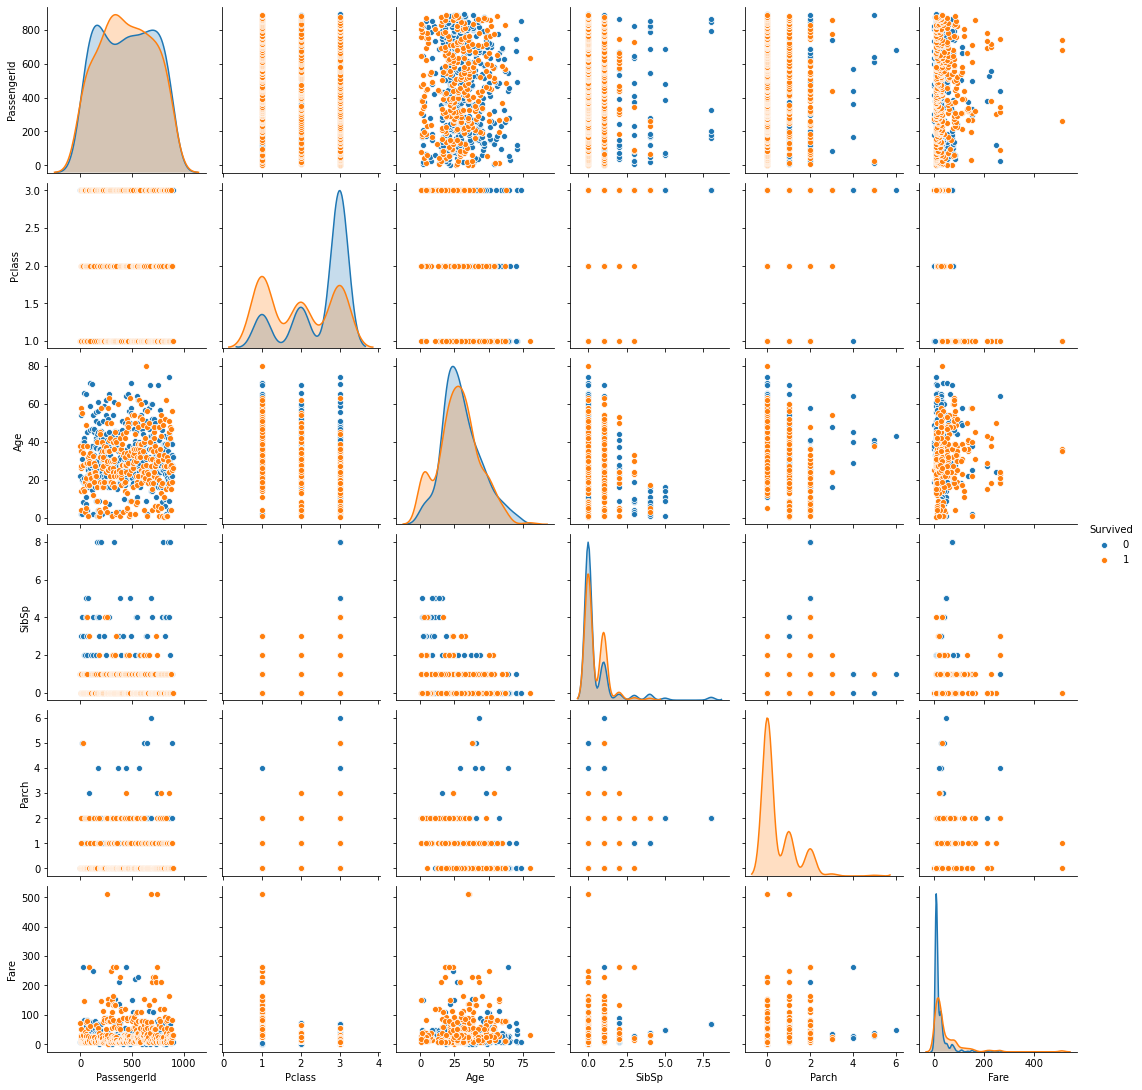

In [11]:
# pairplot
seaborn.pairplot(df_main, hue = 'Survived')
plt.show()

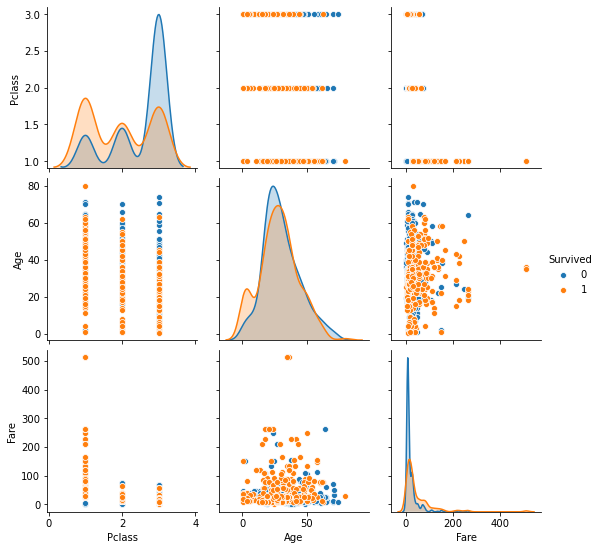

In [12]:
#subplots
seaborn.pairplot(df_main, vars = ['Age', 'Fare'] , hue = 'Survived')
plt.show()

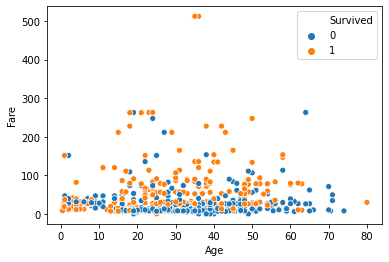

In [163]:
seaborn.scatterplot(data = df_main, x = 'Age', y = 'Fare', hue = 'Survived');

* Missing Data: These columns 'Age', 'Cabin', 'Embarked' has missing data
* Data Types: 'Sex' column needs to be transformed to binary data; the 'embarked'/'name'/'cabin'/'ticket'/'PassengerId' columns are not super useful, could be dropped
* Correlations: The class and survived has correlation with age, pcalss, fare categories. 
* Distrubution: Fare and SibSp right skewed 

### 1.2 Correlates of survival

Use whatever methods you can think of to try and figure out what factors seem to determine whether or not a person would survive the sinking of the Titanic. You can start with simple correlations, but will likely also want to use multiple regression and/or other methods in your toolkit. What do you conclude?

In [1]:
df_sub

NameError: name 'df_sub' is not defined

In [175]:
#drop unwanted col:PassengerId, Name, Ticket, Cabin
df_sub = df_main.drop(['PassengerId','Name', 'Ticket','Cabin','Embarked'], axis = 1)
df_sub

Survived  Pclass     Sex    Age  SibSp  Parch      Fare
0           0       3    male  22.00      1      0    7.2500
1           1       1  female  38.00      1      0   71.2833
2           1       3  female  26.00      0      0    7.9250
3           1       1  female  35.00      1      0   53.1000
4           0       3    male  35.00      0      0    8.0500
5           0       3    male    NaN      0      0    8.4583
6           0       1    male  54.00      0      0   51.8625
7           0       3    male   2.00      3      1   21.0750
8           1       3  female  27.00      0      2   11.1333
9           1       2  female  14.00      1      0   30.0708
10          1       3  female   4.00      1      1   16.7000
11          1       1  female  58.00      0      0   26.5500
12          0       3    male  20.00      0      0    8.0500
13          0       3    male  39.00      1      5   31.2750
14          0       3  female  14.00      0      0    7.8542
15          1       2  female  55.00      0      0   16.0000
16          0       3    male   2.00      4      1   29.1250
17          1       2    male    NaN      0      0   13.0000
18          0       3  female  31.00      1      0   18.0000
19          1       3  female    NaN      0      0    7.2250
20          0       2    male  35.00      0      0   26.0000
21          1       2    male  34.00      0      0   13.0000
22          1       3  female  15.00      0      0    8.0292
23          1       1    male  28.00      0      0   35.5000
24          0       3  female   8.00      3      1   21.0750
25          1       3  female  38.00      1      5   31.3875
26          0       3    male    NaN      0      0    7.2250
27          0       1    male  19.00      3      2  263.0000
28          1       3  female    NaN      0      0    7.8792
29          0       3    male    NaN      0      0    7.8958
30          0       1    male  40.00      0      0   27.7208
31          1       1  female    NaN      1      0  146.5208
32          1       3  female    NaN      0      0    7.7500
33          0       2    male  66.00      0      0   10.5000
34          0       1    male  28.00      1      0   82.1708
35          0       1    male  42.00      1      0   52.0000
36          1       3    male    NaN      0      0    7.2292
37          0       3    male  21.00      0      0    8.0500
38          0       3  female  18.00      2      0   18.0000
39          1       3  female  14.00      1      0   11.2417
40          0       3  female  40.00      1      0    9.4750
41          0       2  female  27.00      1      0   21.0000
42          0       3    male    NaN      0      0    7.8958
43          1       2  female   3.00      1      2   41.5792
44          1       3  female  19.00      0      0    7.8792
45          0       3    male    NaN      0      0    8.0500
46          0       3    male    NaN      1      0   15.5000
47          1       3  female    NaN      0      0    7.7500
48          0       3    male    NaN      2      0   21.6792
49          0       3  female  18.00      1      0   17.8000
50          0       3    male   7.00      4      1   39.6875
51          0       3    male  21.00      0      0    7.8000
52          1       1  female  49.00      1      0   76.7292
53          1       2  female  29.00      1      0   26.0000
54          0       1    male  65.00      0      1   61.9792
55          1       1    male    NaN      0      0   35.5000
56          1       2  female  21.00      0      0   10.5000
57          0       3    male  28.50      0      0    7.2292
58          1       2  female   5.00      1      2   27.7500
59          0       3    male  11.00      5      2   46.9000
60          0       3    male  22.00      0      0    7.2292
61          1       1  female  38.00      0      0   80.0000
62          0       1    male  45.00      1      0   83.4750
63          0       3    male   4.00      3      2   27.9000
64          0       1    male    NaN    

In [176]:
#drop na 
df_full = df_sub.dropna()

In [177]:
df_full.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 714 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  714 non-null    int64  
 1   Pclass    714 non-null    int64  
 2   Sex       714 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     714 non-null    int64  
 5   Parch     714 non-null    int64  
 6   Fare      714 non-null    float64
dtypes: float64(2), int64(4), object(1)
memory usage: 44.6+ KB


In [183]:
#hard code sex col into int val
import category_encoders as ce
#Create object for one-hot encoding
encoder=ce.OneHotEncoder(cols=['Sex','Pclass'],return_df=True,use_cat_names=True)

In [184]:
#Fit and transform Data
data_encoded = encoder.fit_transform(df_full)
data_encoded

Survived  Pclass_3.0  Pclass_1.0  Pclass_2.0  Sex_male  Sex_female  \
0           0           1           0           0         1           0   
1           1           0           1           0         0           1   
2           1           1           0           0         0           1   
3           1           0           1           0         0           1   
4           0           1           0           0         1           0   
6           0           0           1           0         1           0   
7           0           1           0           0         1           0   
8           1           1           0           0         0           1   
9           1           0           0           1         0           1   
10          1           1           0           0         0           1   
11          1           0           1           0         0           1   
12          0           1           0           0         1           0   
13          0           1           0           0         1           0   
14          0           1           0           0         0           1   
15          1           0           0           1         0           1   
16          0           1           0           0         1           0   
18          0           1           0           0         0           1   
20          0           0           0           1         1           0   
21          1           0           0           1         1           0   
22          1           1           0           0         0           1   
23          1           0           1           0         1           0   
24          0           1           0           0         0           1   
25          1           1           0           0         0           1   
27          0           0           1           0         1           0   
30          0           0           1           0         1           0   
33          0           0           0           1         1           0   
34          0           0           1           0         1           0   
35          0           0           1           0         1           0   
37          0           1           0           0         1           0   
38          0           1           0           0         0           1   
39          1           1           0           0         0           1   
40          0           1           0           0         0           1   
41          0           0           0           1         0           1   
43          1           0           0           1         0           1   
44          1           1           0           0         0           1   
49          0           1           0           0         0           1   
50          0           1           0           0         1           0   
51          0           1           0           0         1           0   
52          1           0           1           0         0           1   
53          1           0           0           1         0           1   
54          0           0           1           0         1           0   
56          1           0           0           1         0           1   
57          0           1           0           0         1           0   
58          1           0           0           1         0           1   
59          0           1           0           0         1           0   
60          0           1           0           0         1           0   
61          1           0           1           0         0           1   
62          0           0           1           0         1           0   
63          0           1           0           0         1           0   
66          1           0           0           1         0           1   
67          0           1           0           0         1           0   
68          1           1           0           0         0           1   
69          0           1     

In [185]:
data_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 714 entries, 0 to 890
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    714 non-null    int64  
 1   Pclass_3.0  714 non-null    int64  
 2   Pclass_1.0  714 non-null    int64  
 3   Pclass_2.0  714 non-null    int64  
 4   Sex_male    714 non-null    int64  
 5   Sex_female  714 non-null    int64  
 6   Age         714 non-null    float64
 7   SibSp       714 non-null    int64  
 8   Parch       714 non-null    int64  
 9   Fare        714 non-null    float64
dtypes: float64(2), int64(8)
memory usage: 61.4 KB


#### Simple Logistic Rregression

In [192]:
#based on the visualization, picking feature Age and Pclass3.0, sex to train the regression model
from sklearn.linear_model import LogisticRegression
x = data_encoded[['Age', 'Sex_male','Pclass_3.0']].values
y = data_encoded[['Survived']].values

x_train, x_val, y_train, y_val = train_test_split(x, y, test_size = .2, random_state = 42)
simple_clf = LogisticRegression()
simple_clf.fit(x_train, y_train)
#eva
simple_clf.score(x_val, y_val)

0.7552447552447552

In [201]:
#not including Sex as the feature
x1 = data_encoded[['Age', 'Pclass_3.0']].values
y1 = data_encoded[['Survived']].values

x1_train, x1_val, y1_train, y1_val = train_test_split(x1, y1, test_size = .2, random_state = 42)
simple_clf = LogisticRegression()
simple_clf.fit(x1_train, y1_train)
#eva
simple_clf.score(x1_val, y1_val)

0.6993006993006993

* Sex seems to be one of the strong predictive features.

In [194]:
#added more features to the model
x2 = data_encoded[['Age', 'Pclass_3.0','Sex_male','SibSp','Parch']].values
y2 = data_encoded[['Survived']].values

x2_train, x2_val, y2_train, y2_val = train_test_split(x2, y2, test_size = .2, random_state = 42)
simple_clf = LogisticRegression()
simple_clf.fit(x2_train, y2_train)
#eva
simple_clf.score(x2_val, y2_val)

* Overfit the training data

In [204]:
#weak features
x3 = data_encoded[['SibSp','Parch']].values
y3 = data_encoded[['Survived']].values

x3_train, x3_val, y3_train, y3_val = train_test_split(x3, y3, test_size = .2, random_state = 42)
simple_clf = LogisticRegression()
simple_clf.fit(x3_train, y3_train)
#eva
simple_clf.score(x3_val, y3_val)

0.6223776223776224

* SibSp and Parch are the weker feature

### Overal Findings from logistic regression model

- The best feature combination is: age, sex, class
- Sex is one of the strong feature 
- 'SibSp','Parch' are not that useful. 
- If use all features the model seems to overfit

## Feature Selcetion Explorations

##### split into inputs and target
inputs = data_encoded.drop(['Survived','Sex_female','Pclass_1.0','Pclass_2.0'], axis = 'columns')
target = data_encoded['Survived']

inputs

In [ ]:
#df with only wanted column
df_sub
#encode sex and pclass column 
encoder=ce.OneHotEncoder(cols=['Sex','Pclass'],return_df=True,use_cat_names=True)
df_encoded = encoder.fit_transform(df_sub)
df_encoded

In [209]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression,f_classif
from matplotlib import pyplot
 
# feature selection function
def select_features(X_train, y_train, X_test):
    # configure to select all features
    fs = SelectKBest(score_func=f_classif, k='all')
    
    # learn relationship from training data
    fs.fit(X_train, y_train)
    # transform train input data
    X_train_fs = fs.transform(X_train)
    # transform test input data
    X_test_fs = fs.transform(X_test)
    
    return X_train_fs, X_test_fs, fs

Feature 0: 55.743166
Feature 1: 265.753947
Feature 2: 9.399028
Feature 3: 0.033216
Feature 4: 6.643267
Feature 5: 46.342001


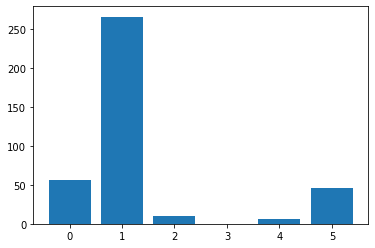

In [210]:
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(inputs, target, test_size=0.2, random_state=42)

# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)

# what are scores for the features
for i in range(len(fs.scores_)):
    print('Feature %d: %f' % (i, fs.scores_[i]))

# plot the scores
pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_)
pyplot.show()

Feature 0: 0.014665
Feature 1: 0.178694
Feature 2: 0.039698
Feature 3: 0.032444
Feature 4: 0.037045
Feature 5: 0.106990


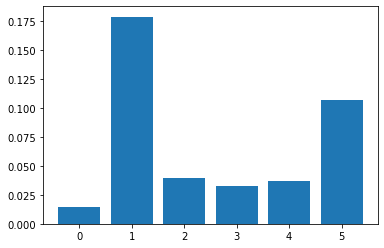

In [206]:
from sklearn.feature_selection import mutual_info_classif
# Split data in train and test sets
# 80% train 20% test

# feature selection
def select_features_mutual(X_train, y_train, X_test):
    # configure to select all features
    fs = SelectKBest(score_func=mutual_info_classif, k='all')
    # learn relationship from training data
    fs.fit(X_train, y_train)
    # transform train input data
    X_train_fs = fs.transform(X_train)
    # transform test input data
    X_test_fs = fs.transform(X_test)
    
    return X_train_fs, X_test_fs, fs


# feature selection
X_train_fs_m, X_test_fs_m, fs_m = select_features_mutual(X_train, y_train, X_test)

# what are scores for the features
for i in range(len(fs_m.scores_)):
    print('Feature %d: %f' % (i, fs_m.scores_[i]))

# plot the scores
pyplot.bar([i for i in range(len(fs_m.scores_))], fs_m.scores_)
pyplot.show()

* using the f_classif function we see calss, gender, and fare have the most significant value, especially for gender. 
* using the mutual_info, the gender and fare has the most significant value. 

## Part 2: Decision Trees
### 2.1 Decision Tree
Using the basic [Decision Tree](http://scikit-learn.org/stable/modules/tree.html#tree) library in sklearn, fit a model to predict titanic survival. Make sure you come up with an appropriate way of handling each of the input variables before feeding them in to the decision tree. You can use the [DecisionTreeClassifier](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier) method to implement 10-fold cross-validation.

For this and the following problems, you should set aside some of your training data as held-out test data, prior to cross-validation. Report the average training and cross-validated accuracy across your 10 folds. Finally, select the best-performing decision tree (i.e., the one that achieved the highest cross-validated performance) and report the performance of the fitted model on the held-out test data -- how does it compare to the cross-validated accuracy? Show a diagram of this tree (at least the first three levels).

NOTE - You may ignore columns with null values for now, but in later questions you should make sure to include these features where appropriate. Apart from that, feel free to perform other pre-processing you may need to at this step before you fit your model.  

In [230]:
data_encoded.shape

(714, 10)

In [232]:
(714*0.8)

571.2

In [233]:
# set aside 20% of data as test data
#data_encode 
X_train_dt = data_encoded[0:571]
X_test_dt = data_encoded[571:]

In [239]:
X_train_dt

Survived  Pclass_3.0  Pclass_1.0  Pclass_2.0  Sex_male  Sex_female  \
0           0           1           0           0         1           0   
1           1           0           1           0         0           1   
2           1           1           0           0         0           1   
3           1           0           1           0         0           1   
4           0           1           0           0         1           0   
6           0           0           1           0         1           0   
7           0           1           0           0         1           0   
8           1           1           0           0         0           1   
9           1           0           0           1         0           1   
10          1           1           0           0         0           1   
11          1           0           1           0         0           1   
12          0           1           0           0         1           0   
13          0           1           0           0         1           0   
14          0           1           0           0         0           1   
15          1           0           0           1         0           1   
16          0           1           0           0         1           0   
18          0           1           0           0         0           1   
20          0           0           0           1         1           0   
21          1           0           0           1         1           0   
22          1           1           0           0         0           1   
23          1           0           1           0         1           0   
24          0           1           0           0         0           1   
25          1           1           0           0         0           1   
27          0           0           1           0         1           0   
30          0           0           1           0         1           0   
33          0           0           0           1         1           0   
34          0           0           1           0         1           0   
35          0           0           1           0         1           0   
37          0           1           0           0         1           0   
38          0           1           0           0         0           1   
39          1           1           0           0         0           1   
40          0           1           0           0         0           1   
41          0           0           0           1         0           1   
43          1           0           0           1         0           1   
44          1           1           0           0         0           1   
49          0           1           0           0         0           1   
50          0           1           0           0         1           0   
51          0           1           0           0         1           0   
52          1           0           1           0         0           1   
53          1           0           0           1         0           1   
54          0           0           1           0         1           0   
56          1           0           0           1         0           1   
57          0           1           0           0         1           0   
58          1           0           0           1         0           1   
59          0           1           0           0         1           0   
60          0           1           0           0         1           0   
61          1           0           1           0         0           1   
62          0           0           1           0         1           0   
63          0           1           0           0         1           0   
66          1           0           0           1         0           1   
67          0           1           0           0         1           0   
68          1           1           0           0         0           1   
69          0           1     

In [240]:
# split into inputs and target for the training set
inputs = X_train_dt.drop(['Survived','Sex_female','Pclass_1.0','Pclass_2.0'], axis = 'columns')
target = X_train_dt['Survived']

In [502]:
inputs_test = X_test_dt.drop(['Survived','Sex_female','Pclass_1.0','Pclass_2.0'], axis = 'columns')
target_test = X_test_dt['Survived']

In [503]:
inputs_test

Pclass_3.0  Sex_male    Age  SibSp  Parch      Fare
719           1         1  33.00      0      0    7.7750
720           0         0   6.00      0      1   33.0000
721           1         1  17.00      1      0    7.0542
722           0         1  34.00      0      0   13.0000
723           0         1  50.00      0      0   13.0000
724           0         1  27.00      1      0   53.1000
725           1         1  20.00      0      0    8.6625
726           0         0  30.00      3      0   21.0000
728           0         1  25.00      1      0   26.0000
729           1         0  25.00      1      0    7.9250
730           0         0  29.00      0      0  211.3375
731           1         1  11.00      0      0   18.7875
733           0         1  23.00      0      0   13.0000
734           0         1  23.00      0      0   13.0000
735           1         1  28.50      0      0   16.1000
736           1         0  48.00      1      3   34.3750
737           0         1  35.00      0      0  512.3292
741           0         1  36.00      1      0   78.8500
742           0         0  21.00      2      2  262.3750
743           1         1  24.00      1      0   16.1000
744           1         1  31.00      0      0    7.9250
745           0         1  70.00      1      1   71.0000
746           1         1  16.00      1      1   20.2500
747           0         0  30.00      0      0   13.0000
748           0         1  19.00      1      0   53.1000
749           1         1  31.00      0      0    7.7500
750           0         0   4.00      1      1   23.0000
751           1         1   6.00      0      1   12.4750
752           1         1  33.00      0      0    9.5000
753           1         1  23.00      0      0    7.8958
754           0         0  48.00      1      2   65.0000
755           0         1   0.67      1      1   14.5000
756           1         1  28.00      0      0    7.7958
757           0         1  18.00      0      0   11.5000
758           1         1  34.00      0      0    8.0500
759           0         0  33.00      0      0   86.5000
761           1         1  41.00      0      0    7.1250
762           1         1  20.00      0      0    7.2292
763           0         0  36.00      1      2  120.0000
764           1         1  16.00      0      0    7.7750
765           0         0  51.00      1      0   77.9583
767           1         0  30.50      0      0    7.7500
769           1         1  32.00      0      0    8.3625
770           1         1  24.00      0      0    9.5000
771           1         1  48.00      0      0    7.8542
772           0         0  57.00      0      0   10.5000
774           0         0  54.00      1      3   23.0000
775           1         1  18.00      0      0    7.7500
777           1         0   5.00      0      0   12.4750
779           0         0  43.00      0      1  211.3375
780           1         0  13.00      0      0    7.2292
781           0         0  17.00      1      0   57.0000
782           0         1  29.00      0      0   30.0000
784           1         1  25.00      0      0    7.0500
785           1         1  25.00      0      0    7.2500
786           1         0  18.00      0      0    7.4958
787           1         1   8.00      4      1   29.1250
788           1         1   1.00      1      2   20.5750
789           0         1  46.00      0      0   79.2000
791           0         1  16.00      0      0   26.0000
794           1         1  25.00      0      0    7.8958
795           0         1  39.00      0      0   13.0000
796           0         0  49.00      0      0   25.9292
797           1         0  31.00      0      0    8.6833
798           1         1  30.00      0      0    7.2292
799           1         0  30.00      1      1   24.1500
800           0         1  34.00      0      0   13.0000
801           0         0  31.00      1      1   26.2500
802           0         1  11.00      1      2  120.0000
803           1

In [242]:
inputs

Pclass_3.0  Sex_male    Age  SibSp  Parch      Fare
0             1         1  22.00      1      0    7.2500
1             0         0  38.00      1      0   71.2833
2             1         0  26.00      0      0    7.9250
3             0         0  35.00      1      0   53.1000
4             1         1  35.00      0      0    8.0500
6             0         1  54.00      0      0   51.8625
7             1         1   2.00      3      1   21.0750
8             1         0  27.00      0      2   11.1333
9             0         0  14.00      1      0   30.0708
10            1         0   4.00      1      1   16.7000
11            0         0  58.00      0      0   26.5500
12            1         1  20.00      0      0    8.0500
13            1         1  39.00      1      5   31.2750
14            1         0  14.00      0      0    7.8542
15            0         0  55.00      0      0   16.0000
16            1         1   2.00      4      1   29.1250
18            1         0  31.00      1      0   18.0000
20            0         1  35.00      0      0   26.0000
21            0         1  34.00      0      0   13.0000
22            1         0  15.00      0      0    8.0292
23            0         1  28.00      0      0   35.5000
24            1         0   8.00      3      1   21.0750
25            1         0  38.00      1      5   31.3875
27            0         1  19.00      3      2  263.0000
30            0         1  40.00      0      0   27.7208
33            0         1  66.00      0      0   10.5000
34            0         1  28.00      1      0   82.1708
35            0         1  42.00      1      0   52.0000
37            1         1  21.00      0      0    8.0500
38            1         0  18.00      2      0   18.0000
39            1         0  14.00      1      0   11.2417
40            1         0  40.00      1      0    9.4750
41            0         0  27.00      1      0   21.0000
43            0         0   3.00      1      2   41.5792
44            1         0  19.00      0      0    7.8792
49            1         0  18.00      1      0   17.8000
50            1         1   7.00      4      1   39.6875
51            1         1  21.00      0      0    7.8000
52            0         0  49.00      1      0   76.7292
53            0         0  29.00      1      0   26.0000
54            0         1  65.00      0      1   61.9792
56            0         0  21.00      0      0   10.5000
57            1         1  28.50      0      0    7.2292
58            0         0   5.00      1      2   27.7500
59            1         1  11.00      5      2   46.9000
60            1         1  22.00      0      0    7.2292
61            0         0  38.00      0      0   80.0000
62            0         1  45.00      1      0   83.4750
63            1         1   4.00      3      2   27.9000
66            0         0  29.00      0      0   10.5000
67            1         1  19.00      0      0    8.1583
68            1         0  17.00      4      2    7.9250
69            1         1  26.00      2      0    8.6625
70            0         1  32.00      0      0   10.5000
71            1         0  16.00      5      2   46.9000
72            0         1  21.00      0      0   73.5000
73            1         1  26.00      1      0   14.4542
74            1         1  32.00      0      0   56.4958
75            1         1  25.00      0      0    7.6500
78            0         1   0.83      0      2   29.0000
79            1         0  30.00      0      0   12.4750
80            1         1  22.00      0      0    9.0000
81            1         1  29.00      0      0    9.5000
83            0         1  28.00      0      0   47.1000
84            0         0  17.00      0      0   10.5000
85            1         0  33.00      3      0   15.8500
86            1         1  16.00      1      3   34.3750
88            0         0  23.00      3      2  263.0000
89            1         1  24.00      0      0    8.0500
90            1

In [243]:
#scale our data by creating an instance of the scaler and scaling it:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
inputs_scaler = scaler.fit_transform(inputs)

In [246]:
test_size = 0.2
state = 42
#split into train and validation set without scaler
X_train_dt, X_val_dt, y_train_dt, y_val_dt = train_test_split(inputs, target, test_size=test_size, random_state=state)

In [247]:
#split into train and validation set with scaler
X_train_dt_scaler, X_val_dt_scaler, y_train_dt_scaler, y_val_dt_scaler = train_test_split(inputs_scaler, target,  
    test_size=test_size, random_state=state)

In [248]:
from sklearn import tree

In [513]:
# fit tree model using with scaler 
#useful params: criterion='gini', max_depth (for prunning)
model = tree.DecisionTreeClassifier(criterion='gini', random_state = 42)
model.fit(X_train_dt_scaler, y_train_dt_scaler)
print(model.get_n_leaves())
print(model.get_depth())
predict_labels = model.predict(X_val_dt_scaler)
print("Accuracy of decision tree is {}".format(sum(predict_labels==y_val_dt_scaler)/len(y_val_dt_scaler)))

108
14
Accuracy of decision tree is 0.7391304347826086


In [512]:
# fit tree model using with scaler
# useful params: criterion='gini', max_depth (for prunning)
model = tree.DecisionTreeClassifier(criterion='gini', random_state = 42)
model.fit(X_train_dt, y_train_dt)
print(model.get_n_leaves())
print(model.get_depth())
predict_labels = model.predict(X_val_dt)
print("Accuracy of decision tree is {}".format(sum(predict_labels==y_val_dt)/len(y_val_dt)))

108
14
Accuracy of decision tree is 0.7391304347826086


* No difference in accuracy score using scaled data and original data, so for the following DT model, using the original data frame.

In [514]:
# function for fitting trees of various depths on the training data using cross-validation
def run_cross_validation_on_trees(X_train, y_train, X_val, y_val, cv = 10, scoring='accuracy'):
    #initialization
    cv_scores_list = []
    cv_scores_std = []
    cv_scores_mean = []
    train_scores = []
    val_scores = []
    
    #cross validate and test scores
    tree_model = tree.DecisionTreeClassifier(random_state = 42)
    cv_scores = cross_val_score(tree_model,X_train, y_train, cv = cv, scoring = scoring)
    cv_scores_list.append(cv_scores)
    cv_scores_mean.append(cv_scores.mean())
    cv_scores_std.append(cv_scores.std())
    
    
    #training score
    train_scores.append(tree_model.fit(X_train, y_train).score(X_train, y_train))
    #test score 
    val_scores.append(tree_model.fit(X_train, y_train).score(X_val, y_val))
    
    #list to array
    cv_scores_list = np.array(cv_scores_list)    
    cv_scores_mean = np.array(cv_scores_mean)
    cv_scores_std = np.array(cv_scores_std)
    train_scores = np.array(train_scores)
    val_scores = np.array(val_scores)
    
    return cv_scores_list, cv_scores_mean, cv_scores_std, train_scores, val_scores

In [515]:
cv_scores_list, cv_scores_mean, cv_scores_std, train_scores,val_scores = run_cross_validation_on_trees(X_train_dt, y_train_dt, X_val_dt, y_val_dt)

In [516]:
print('Accuracy, CV Set: ', cv_scores_list) 
print('CV score mean: ', cv_scores_mean) 
print('STD CV score: ', cv_scores_std) 
print('Accuracy, Training Set: ', train_scores)
print('Accuracy, Validation Set: ', val_scores)


Accuracy, CV Set:  [[0.60869565 0.7173913  0.69565217 0.82608696 0.80434783 0.73913043
  0.8        0.73333333 0.86666667 0.71111111]]
CV score mean:  [0.75024155]
STD CV score:  [0.07123598]
Accuracy, Training Set:  [0.98903509]
Accuracy, Validation Set:  [0.73913043]


In [518]:
tree_model_final = tree.DecisionTreeClassifier()
tree_model_final.fit(X_train_dt, y_train_dt)

tree_model_final.score(inputs_test, target_test)

0.7832167832167832

* The cross validation has a mean score of 0.75, the training score is 0.98 whereas validation score is 0.73; using the final model on hold on test set has a accuracy score of 0.7832. 

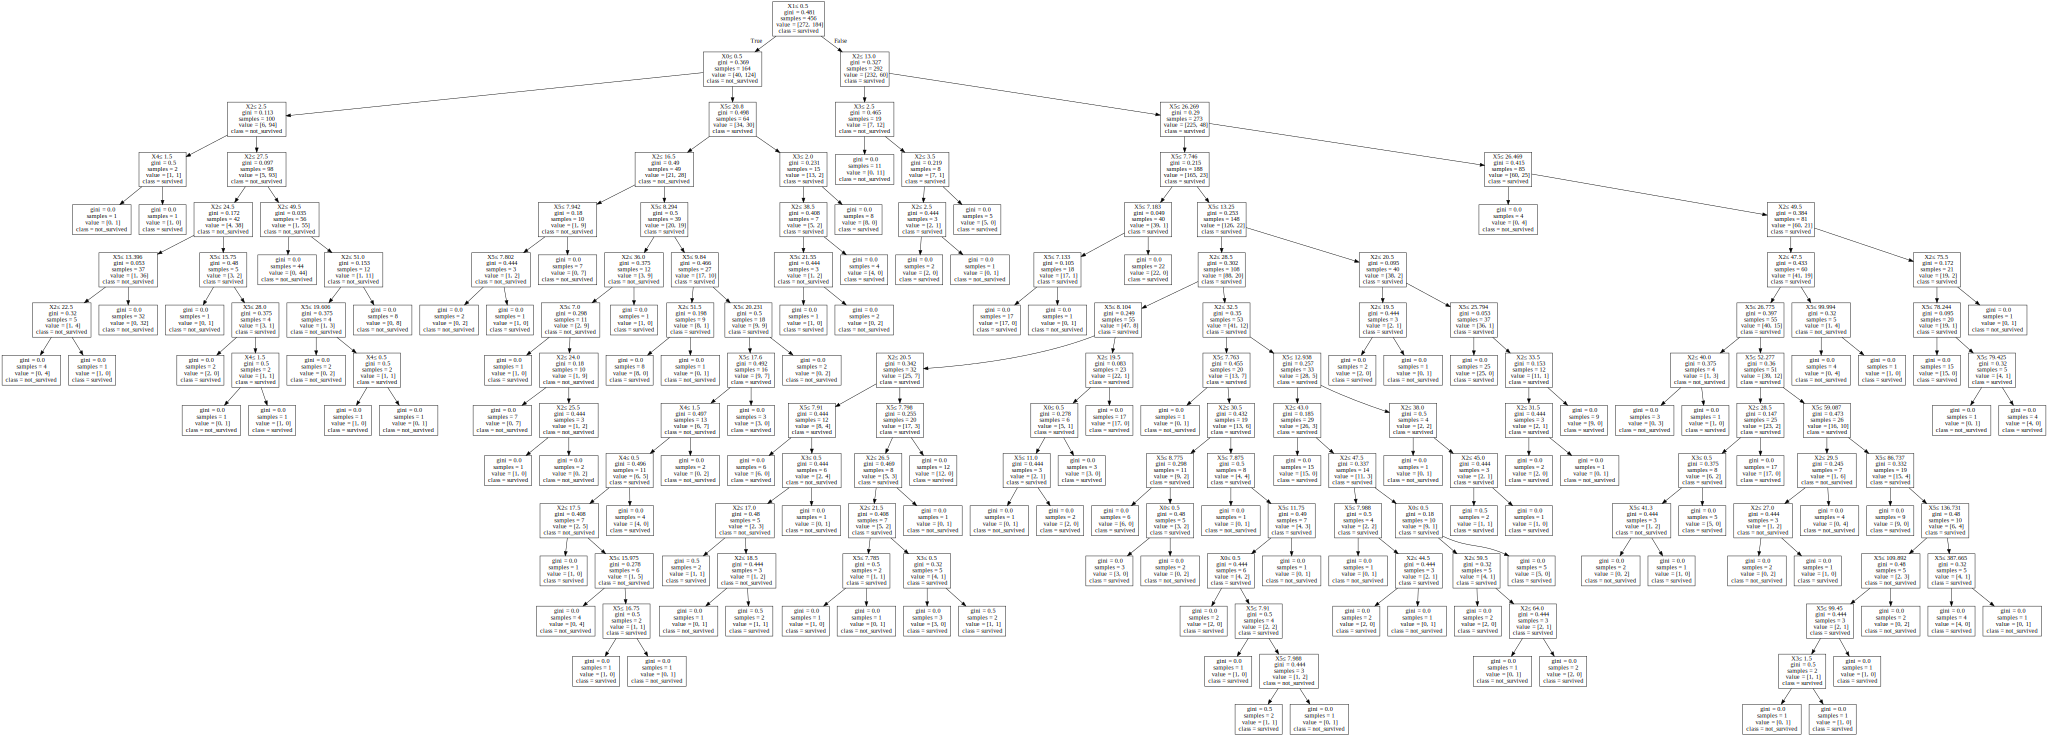

In [525]:
import graphviz 
# 0-not_survived, 1-survived
dot_data = tree.export_graphviz(tree_model_final, out_file=None,
                                class_names=['survived','not_survived'],                              
                                special_characters=True)
graph = graphviz.Source(dot_data)
graph

### 2.2 Tree Diagram & Features

Use all of the data (minus the held-out data) to re-fit a single decision tree with `max_depth = 5` (i.e., no cross-validation). Show the tree diagram and also plot the feature importance. What do you observe? How does the performance of this tree compare to the tree from 2.1?

In [519]:
# function for training and evaluating a tree
def run_single_tree(X_train, y_train, depth):
    model = tree.DecisionTreeClassifier(max_depth =depth, random_state = 42).fit(X_train, y_train)
    accuracy_train = model.score(X_train, y_train)
    print('Single tree depth: ', depth)
    print('Accuracy, Training Set: ', round(accuracy_train*100), '%')
    return accuracy_train

# train and evaluate a tree
best_tree_accuracy_train = run_single_tree(inputs, target, 5)

Single tree depth:  5
Accuracy, Training Set:  84 %


In [521]:
tree_model_final_2 = tree.DecisionTreeClassifier(max_depth = 5, random_state = 42)
tree_model_final_2.fit(inputs, target)

tree_model_final_2.score(inputs_test, target_test)

0.8671328671328671

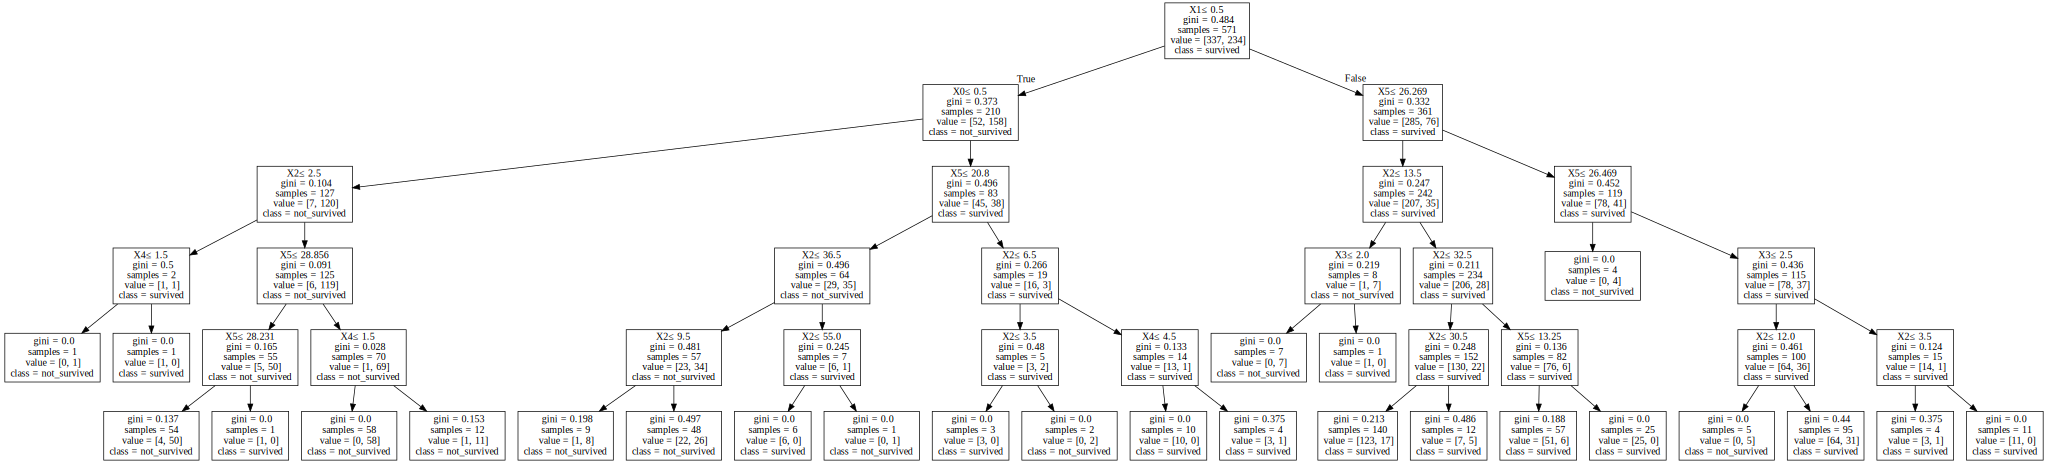

In [524]:
dot_data_2 = tree.export_graphviz(tree_model_final_2, out_file=None,
                                class_names=['survived','not_survived'],                              
                                special_characters=True, max_depth=5)
graph = graphviz.Source(dot_data_2)
graph

* adding the hyperparameter max_depth increased the training accuracy and test accuracy. 

### 2.3 Sensitivity analysis
The built-in algorithm you are using has several parameters which you can tune. Using cross-validation, show how the choice of these parameters affects performance.

First, show how `max_depth` affects train and cross-validated accuracy. On a single axis, plot train and cross-validated accuracy as a function of `max_depth`. Use a red line to show cross-validated accuracy and a blue line to show train accuracy. Do not use your held-out test data yet.

Second, show how cross-validated accuracy relates to both `max_depth` and `min_samples_leaf`. Specifically, create a 3-D plot where the x-axis is `max_depth`, the y-axis is `min_samples_leaf`, and the z-axis shows cross-validated accuracy. What combination of `max_depth` and `min-samples_leaf` achieves the highest accuracy? How sensitive are the results to these two parameters?

Finally, with the best hyperparameters that you got through cross-validation, report your hold-out test accuracy.

In [558]:
# function for fitting trees of various depths on the training data using cross-validation
def cross_validation_on_treedepths(X, y, tree_depths, cv=5, scoring='accuracy'):
    cv_scores_list = []
    cv_scores_std = []
    cv_scores_mean = []
    accuracy_scores = []
    
    for depth in tree_depths:
        tree_model = tree.DecisionTreeClassifier(criterion='entropy', max_depth=depth,random_state = 42)
        cv_scores = cross_val_score(tree_model, X, y, cv=cv, scoring=scoring)
        cv_scores_list.append(cv_scores)
        cv_scores_mean.append(cv_scores.mean())
        cv_scores_std.append(cv_scores.std())
        accuracy_scores.append(tree_model.fit(X, y).score(X, y))
        
    cv_scores_mean = np.array(cv_scores_mean)
    cv_scores_std = np.array(cv_scores_std)
    accuracy_scores = np.array(accuracy_scores)
    
    return cv_scores_mean, cv_scores_std, accuracy_scores


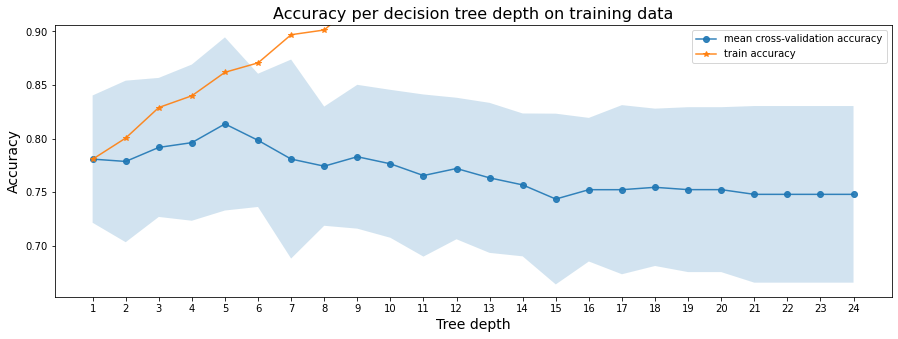

In [559]:
# function for plotting cross-validation results
def plot_cross_validation_on_trees(depths, cv_scores_mean, cv_scores_std, accuracy_scores, title):
    fig, ax = plt.subplots(1,1, figsize=(15,5))
    ax.plot(depths, cv_scores_mean, '-o', label='mean cross-validation accuracy', alpha=0.9)
    ax.fill_between(depths, cv_scores_mean-2*cv_scores_std, cv_scores_mean+2*cv_scores_std, alpha=0.2)
    ylim = plt.ylim()
    ax.plot(depths, accuracy_scores, '-*', label='train accuracy', alpha=0.9)
    ax.set_title(title, fontsize=16)
    ax.set_xlabel('Tree depth', fontsize=14)
    ax.set_ylabel('Accuracy', fontsize=14)
    ax.set_ylim(ylim)
    ax.set_xticks(depths)
    ax.legend()

# fitting trees of depth 1 to 24
sm_tree_depths = range(1,25)
sm_cv_scores_mean, sm_cv_scores_std, sm_accuracy_scores = cross_validation_on_treedepths(X_train_dt, y_train_dt, sm_tree_depths)

# plotting accuracy
plot_cross_validation_on_trees(sm_tree_depths, sm_cv_scores_mean, sm_cv_scores_std, sm_accuracy_scores, 
                               'Accuracy per decision tree depth on training data')

In [560]:
# function for fitting trees of various depths on the training data using cross-validation
def cross_validation_on_treedepths_and_samples_leaf(X, y, tree_depths, samples_leaf, cv=5, scoring='accuracy'):
    cv_scores_list = []
    cv_scores_std = []
    cv_scores_mean = []
    accuracy_scores = []
    best_score = -1000
    best_depth_par = 0
    best_leaf_par = 0
    
    for depth in tree_depths:
        print('Current Depth: ', depth)
        for leaf in samples_leaf:
            print("Current Leaf: ", leaf)
            
            tree_model = tree.DecisionTreeClassifier(criterion='entropy', max_depth=depth, min_samples_leaf=leaf,random_state = 42)
            cv_scores = cross_val_score(tree_model, X, y, cv=cv, scoring=scoring)            
            cv_scores_list.append(cv_scores)
            print('cv score list: ', cv_scores)
            
            cur_mean = cv_scores.mean()
            cv_scores_mean.append(cur_mean)
            cv_scores_std.append(cv_scores.std())
            accuracy_scores.append(tree_model.fit(X, y).score(X, y))
            print('Accuracy score: ', accuracy_scores)
            
            if cur_mean > best_score:
                best_score = cur_mean
                best_depth_par = depth
                best_leaf_par = leaf
                
        
    cv_scores_mean = np.array(cv_scores_mean)
    cv_scores_std = np.array(cv_scores_std)
    accuracy_scores = np.array(accuracy_scores)
    
    return cv_scores_mean, cv_scores_std, accuracy_scores, best_score, best_depth_par, best_leaf_par

In [561]:
# fitting trees of depth 1 to 24
sm_tree_depths = range(1,25)
sm_samples_leaf = range(1,25)

sm2_cv_scores_mean, sm2_cv_scores_std, sm2_accuracy_scores, best_score, best_depth_par, best_leaf_par = cross_validation_on_treedepths_and_samples_leaf(X_train_dt, y_train_dt, sm_tree_depths, sm_samples_leaf)

Current Depth:  1
Current Leaf:  1
cv score list:  [0.75       0.78021978 0.83516484 0.75824176 0.78021978]
Accuracy score:  [0.7807017543859649]
Current Leaf:  2
cv score list:  [0.75       0.78021978 0.83516484 0.75824176 0.78021978]
Accuracy score:  [0.7807017543859649, 0.7807017543859649]
Current Leaf:  3
cv score list:  [0.75       0.78021978 0.83516484 0.75824176 0.78021978]
Accuracy score:  [0.7807017543859649, 0.7807017543859649, 0.7807017543859649]
Current Leaf:  4
cv score list:  [0.75       0.78021978 0.83516484 0.75824176 0.78021978]
Accuracy score:  [0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649]
Current Leaf:  5
cv score list:  [0.75       0.78021978 0.83516484 0.75824176 0.78021978]
Accuracy score:  [0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649]
Current Leaf:  6
cv score list:  [0.75       0.78021978 0.83516484 0.75824176 0.78021978]
Accuracy score:  [0.7807017543859649, 0.780701754385

Accuracy score:  [0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281]
Current Leaf:  6
cv score list:  [0.73913043 0.74725275 0.82417582 0.75824176 0.82417582]
Accuracy score:  [0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.780701754385

Accuracy score:  [0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281]
Current Leaf:  19
cv score list:  [0.75       0.71428571 0.82417582 0.75824176 0.8021978 ]
Accuracy score:  [0.7807017543859649, 0.78070175438

Accuracy score:  [0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.7960526315789473, 0.7960526315789473, 0.793859649122807, 0.7894736842105263, 0.7894736842105263, 0.8289473684210527, 0.8

Accuracy score:  [0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.7960526315789473, 0.7960526315789473, 0.793859649122807, 0.7894736842105263, 0.7894736842105263, 0.8289473684210527, 0.8

Accuracy score:  [0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.7960526315789473, 0.7960526315789473, 0.793859649122807, 0.7894736842105263, 0.7894736842105263, 0.8289473684210527, 0.8

Accuracy score:  [0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.7960526315789473, 0.7960526315789473, 0.793859649122807, 0.7894736842105263, 0.7894736842105263, 0.8289473684210527, 0.8

Accuracy score:  [0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.7960526315789473, 0.7960526315789473, 0.793859649122807, 0.7894736842105263, 0.7894736842105263, 0.8289473684210527, 0.8

Accuracy score:  [0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.7960526315789473, 0.7960526315789473, 0.793859649122807, 0.7894736842105263, 0.7894736842105263, 0.8289473684210527, 0.8

Accuracy score:  [0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.7960526315789473, 0.7960526315789473, 0.793859649122807, 0.7894736842105263, 0.7894736842105263, 0.8289473684210527, 0.8

Accuracy score:  [0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.7960526315789473, 0.7960526315789473, 0.793859649122807, 0.7894736842105263, 0.7894736842105263, 0.8289473684210527, 0.8

cv score list:  [0.77173913 0.73626374 0.81318681 0.76923077 0.81318681]
Accuracy score:  [0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.7960526315789473, 0.7960526315789473, 0.7938596

Accuracy score:  [0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.7960526315789473, 0.7960526315789473, 0.793859649122807, 0.7894736842105263, 0.7894736842105263, 0.8289473684210527, 0.8

Accuracy score:  [0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.7960526315789473, 0.7960526315789473, 0.793859649122807, 0.7894736842105263, 0.7894736842105263, 0.8289473684210527, 0.8

Accuracy score:  [0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.7960526315789473, 0.7960526315789473, 0.793859649122807, 0.7894736842105263, 0.7894736842105263, 0.8289473684210527, 0.8

Accuracy score:  [0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.7960526315789473, 0.7960526315789473, 0.793859649122807, 0.7894736842105263, 0.7894736842105263, 0.8289473684210527, 0.8

Accuracy score:  [0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.7960526315789473, 0.7960526315789473, 0.793859649122807, 0.7894736842105263, 0.7894736842105263, 0.8289473684210527, 0.8

Accuracy score:  [0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.7960526315789473, 0.7960526315789473, 0.793859649122807, 0.7894736842105263, 0.7894736842105263, 0.8289473684210527, 0.8

Accuracy score:  [0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.7960526315789473, 0.7960526315789473, 0.793859649122807, 0.7894736842105263, 0.7894736842105263, 0.8289473684210527, 0.8

Accuracy score:  [0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.7960526315789473, 0.7960526315789473, 0.793859649122807, 0.7894736842105263, 0.7894736842105263, 0.8289473684210527, 0.8

cv score list:  [0.77173913 0.73626374 0.81318681 0.76923077 0.81318681]
Accuracy score:  [0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.7960526315789473, 0.7960526315789473, 0.7938596

Accuracy score:  [0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.7960526315789473, 0.7960526315789473, 0.793859649122807, 0.7894736842105263, 0.7894736842105263, 0.8289473684210527, 0.8

Accuracy score:  [0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.7960526315789473, 0.7960526315789473, 0.793859649122807, 0.7894736842105263, 0.7894736842105263, 0.8289473684210527, 0.8

Accuracy score:  [0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.7960526315789473, 0.7960526315789473, 0.793859649122807, 0.7894736842105263, 0.7894736842105263, 0.8289473684210527, 0.8

Accuracy score:  [0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.7960526315789473, 0.7960526315789473, 0.793859649122807, 0.7894736842105263, 0.7894736842105263, 0.8289473684210527, 0.8

Accuracy score:  [0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.7960526315789473, 0.7960526315789473, 0.793859649122807, 0.7894736842105263, 0.7894736842105263, 0.8289473684210527, 0.8

Accuracy score:  [0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.7960526315789473, 0.7960526315789473, 0.793859649122807, 0.7894736842105263, 0.7894736842105263, 0.8289473684210527, 0.8

Accuracy score:  [0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.7960526315789473, 0.7960526315789473, 0.793859649122807, 0.7894736842105263, 0.7894736842105263, 0.8289473684210527, 0.8

Accuracy score:  [0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.7960526315789473, 0.7960526315789473, 0.793859649122807, 0.7894736842105263, 0.7894736842105263, 0.8289473684210527, 0.8

Accuracy score:  [0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.7960526315789473, 0.7960526315789473, 0.793859649122807, 0.7894736842105263, 0.7894736842105263, 0.8289473684210527, 0.8

Accuracy score:  [0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.7960526315789473, 0.7960526315789473, 0.793859649122807, 0.7894736842105263, 0.7894736842105263, 0.8289473684210527, 0.8

Accuracy score:  [0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.7960526315789473, 0.7960526315789473, 0.793859649122807, 0.7894736842105263, 0.7894736842105263, 0.8289473684210527, 0.8

Accuracy score:  [0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.7960526315789473, 0.7960526315789473, 0.793859649122807, 0.7894736842105263, 0.7894736842105263, 0.8289473684210527, 0.8

Accuracy score:  [0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.7960526315789473, 0.7960526315789473, 0.793859649122807, 0.7894736842105263, 0.7894736842105263, 0.8289473684210527, 0.8

Accuracy score:  [0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.7960526315789473, 0.7960526315789473, 0.793859649122807, 0.7894736842105263, 0.7894736842105263, 0.8289473684210527, 0.8

Accuracy score:  [0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.7960526315789473, 0.7960526315789473, 0.793859649122807, 0.7894736842105263, 0.7894736842105263, 0.8289473684210527, 0.8

Accuracy score:  [0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.7960526315789473, 0.7960526315789473, 0.793859649122807, 0.7894736842105263, 0.7894736842105263, 0.8289473684210527, 0.8

cv score list:  [0.75       0.74725275 0.84615385 0.71428571 0.82417582]
Accuracy score:  [0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.7960526315789473, 0.7960526315789473, 0.7938596

Accuracy score:  [0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.7960526315789473, 0.7960526315789473, 0.793859649122807, 0.7894736842105263, 0.7894736842105263, 0.8289473684210527, 0.8

Accuracy score:  [0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.7960526315789473, 0.7960526315789473, 0.793859649122807, 0.7894736842105263, 0.7894736842105263, 0.8289473684210527, 0.8

Accuracy score:  [0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.7960526315789473, 0.7960526315789473, 0.793859649122807, 0.7894736842105263, 0.7894736842105263, 0.8289473684210527, 0.8

Accuracy score:  [0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.7960526315789473, 0.7960526315789473, 0.793859649122807, 0.7894736842105263, 0.7894736842105263, 0.8289473684210527, 0.8

Accuracy score:  [0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.7960526315789473, 0.7960526315789473, 0.793859649122807, 0.7894736842105263, 0.7894736842105263, 0.8289473684210527, 0.8

Accuracy score:  [0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.7960526315789473, 0.7960526315789473, 0.793859649122807, 0.7894736842105263, 0.7894736842105263, 0.8289473684210527, 0.8

Accuracy score:  [0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.7960526315789473, 0.7960526315789473, 0.793859649122807, 0.7894736842105263, 0.7894736842105263, 0.8289473684210527, 0.8

Accuracy score:  [0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.7960526315789473, 0.7960526315789473, 0.793859649122807, 0.7894736842105263, 0.7894736842105263, 0.8289473684210527, 0.8

Accuracy score:  [0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.7960526315789473, 0.7960526315789473, 0.793859649122807, 0.7894736842105263, 0.7894736842105263, 0.8289473684210527, 0.8

Accuracy score:  [0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.7960526315789473, 0.7960526315789473, 0.793859649122807, 0.7894736842105263, 0.7894736842105263, 0.8289473684210527, 0.8

Accuracy score:  [0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.7960526315789473, 0.7960526315789473, 0.793859649122807, 0.7894736842105263, 0.7894736842105263, 0.8289473684210527, 0.8

Accuracy score:  [0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.7960526315789473, 0.7960526315789473, 0.793859649122807, 0.7894736842105263, 0.7894736842105263, 0.8289473684210527, 0.8

Accuracy score:  [0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.7960526315789473, 0.7960526315789473, 0.793859649122807, 0.7894736842105263, 0.7894736842105263, 0.8289473684210527, 0.8

Accuracy score:  [0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.7960526315789473, 0.7960526315789473, 0.793859649122807, 0.7894736842105263, 0.7894736842105263, 0.8289473684210527, 0.8

Accuracy score:  [0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.7960526315789473, 0.7960526315789473, 0.793859649122807, 0.7894736842105263, 0.7894736842105263, 0.8289473684210527, 0.8

Accuracy score:  [0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.7960526315789473, 0.7960526315789473, 0.793859649122807, 0.7894736842105263, 0.7894736842105263, 0.8289473684210527, 0.8

cv score list:  [0.7173913  0.76923077 0.82417582 0.74725275 0.83516484]
Accuracy score:  [0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.7960526315789473, 0.7960526315789473, 0.7938596

cv score list:  [0.75       0.79120879 0.84615385 0.7032967  0.82417582]
Accuracy score:  [0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.7960526315789473, 0.7960526315789473, 0.7938596

Accuracy score:  [0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.7960526315789473, 0.7960526315789473, 0.793859649122807, 0.7894736842105263, 0.7894736842105263, 0.8289473684210527, 0.8

Accuracy score:  [0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.7960526315789473, 0.7960526315789473, 0.793859649122807, 0.7894736842105263, 0.7894736842105263, 0.8289473684210527, 0.8

Accuracy score:  [0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.7960526315789473, 0.7960526315789473, 0.793859649122807, 0.7894736842105263, 0.7894736842105263, 0.8289473684210527, 0.8

Accuracy score:  [0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.7960526315789473, 0.7960526315789473, 0.793859649122807, 0.7894736842105263, 0.7894736842105263, 0.8289473684210527, 0.8

Accuracy score:  [0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.7960526315789473, 0.7960526315789473, 0.793859649122807, 0.7894736842105263, 0.7894736842105263, 0.8289473684210527, 0.8

Accuracy score:  [0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.7960526315789473, 0.7960526315789473, 0.793859649122807, 0.7894736842105263, 0.7894736842105263, 0.8289473684210527, 0.8

Accuracy score:  [0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.7960526315789473, 0.7960526315789473, 0.793859649122807, 0.7894736842105263, 0.7894736842105263, 0.8289473684210527, 0.8

Accuracy score:  [0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.7960526315789473, 0.7960526315789473, 0.793859649122807, 0.7894736842105263, 0.7894736842105263, 0.8289473684210527, 0.8

Accuracy score:  [0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.7960526315789473, 0.7960526315789473, 0.793859649122807, 0.7894736842105263, 0.7894736842105263, 0.8289473684210527, 0.8

Accuracy score:  [0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.7960526315789473, 0.7960526315789473, 0.793859649122807, 0.7894736842105263, 0.7894736842105263, 0.8289473684210527, 0.8

Accuracy score:  [0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.7960526315789473, 0.7960526315789473, 0.793859649122807, 0.7894736842105263, 0.7894736842105263, 0.8289473684210527, 0.8

Accuracy score:  [0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.7960526315789473, 0.7960526315789473, 0.793859649122807, 0.7894736842105263, 0.7894736842105263, 0.8289473684210527, 0.8

Accuracy score:  [0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.7807017543859649, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.8004385964912281, 0.7960526315789473, 0.7960526315789473, 0.793859649122807, 0.7894736842105263, 0.7894736842105263, 0.8289473684210527, 0.8

In [562]:
print('best score is : ', best_score)
print('best depth parameter is: ', best_depth_par)
print('best leaf parameter is: ', best_leaf_par)

best score is :  0.8201385570950788
best depth parameter is:  5
best leaf parameter is:  4


In [563]:
import plotly.graph_objects as go
import plotly.express as px
import plotly.figure_factory as ff
from plotly.subplots import make_subplots

In [537]:
# function for plotting cross-validation results
def plot_cross_validation_3d(depths, samples_leaf, cv_scores_mean):
    #fig, ax = plt.subplots(1,1, figsize=(15,5))
    depths = np.array(depths)
    samples_leaf = np.array(samples_leaf)
    
    data_scatter = go.Scatter3d(x= depths, y= samples_leaf, z= np.array(cv_scores_mean), 
                            mode="markers",
                            marker=dict(size=2))
    layout = dict(margin=dict(l=0, r=0, t=0, b=0), 
                  height=600,
                  scene = dict(xaxis_title='Tree depth', yaxis_title='Samples Leaf', zaxis_title='Accuracy'))
    
    return go.Figure([data_scatter], layout)


# plotting accuracy
plot_cross_validation_3d(sm_tree_depths, sm_samples_leaf, sm2_cv_scores_mean)

In [564]:
tree_model_final = tree.DecisionTreeClassifier(criterion='entropy', max_depth=best_depth_par, min_samples_leaf=best_leaf_par, random_state = 42)
test_score = tree_model_final.fit(inputs, target).score(inputs_test, target_test)
test_score

0.8321678321678322

* Has better test accuracy score of 0.832, the best feature combinations are depth parameter is:  5, leaf parameter is:  4.

### 2.4 Support Vector Machines, for comparison

As a starting point, use the basic [sklearn SVM model](https://scikit-learn.org/stable/modules/svm.html), with the default constant penalization (C=1), to predict survival using the same set of features as above. Report your accuracy on the test and train sets.

Next, use cross-validation to determine a possibly better choice for C. Note that regularization is inversely proportional to the value of C in sklearn, i.e. the higher value you choose for C the less you regularize. Plot a graph with C on the x-axis and cross-validated accuracy on the y-axis.
    
    
How does the test performance with SVM for your best choice of C compare to the decision tree from 2.3?

In [324]:
from sklearn import svm
# Create a model
clf = svm.SVC(kernel='linear') 
# SVC params: C (regularization penalty)

# Train model
clf.fit(X_train_dt, y_train_dt)
# Get coefficient and intercept
print(clf.coef_)
print(clf.intercept_)
# Predict response 
y_pred = clf.predict(X_val_dt)
print("Accuracy of SVM is {}".format(sum(y_pred==y_val_dt)/len(y_val_dt)))

[[-2.36792444e-03 -2.00111208e+00 -1.40312891e-04 -2.21669205e-03
  -1.83016704e-03  4.63263641e-05]]
[1.0054058]
Accuracy of SVM is 0.7565217391304347


In [325]:
clf1 = svm.SVC(kernel='linear', C=1000000)
clf1.fit(X_train_dt, y_train_dt)
print(clf1.coef_)
print(clf1.intercept_)
y_pred1 = clf1.predict(X_val_dt)
print("Accuracy of SVM is {}".format(sum(y_pred1 == y_val_dt)/len(y_val_dt)))

[[  126.168282   -2560.89589111   -58.33331386  -492.25324331
   -456.91308504    27.63407118]]
[2487.13378352]
Accuracy of SVM is 0.7391304347826086


In [337]:
clf2 = svm.SVC(kernel='linear', C=.0000001) 
clf2.fit(X_train_dt, y_train_dt) 
print(clf2.coef_)
print(clf2.intercept_)
y_pred2 = clf2.predict(X_val_dt)
print("Accuracy of SVM is {}".format(sum(y_pred2 == y_val_dt)/len(y_val_dt)))

[[-3.7000000e-06 -9.0000000e-06 -3.2650000e-05 -5.0000000e-06
  -1.6000000e-06  2.4281629e-04]]
[-1.00133178]
Accuracy of SVM is 0.5652173913043478


In [358]:
from sklearn import svm
# Create a model
clf = svm.SVC(kernel='rbf', C= 10) 
# Train model
clf.fit(X_train_dt, y_train_dt)
print(clf.intercept_)
# Predict response 
y_pred = clf.predict(X_val_dt)
print("Accuracy of SVM is {}".format(sum(y_pred==y_val_dt)/len(y_val_dt)))

[0.46295274]
Accuracy of SVM is 0.6869565217391305


In [370]:
from sklearn import svm
# Create a model
clf = svm.SVC(kernel='rbf', C=90) 
# Train model
clf.fit(X_train_dt, y_train_dt)
print(clf.intercept_)
# Predict response 
y_pred = clf.predict(X_val_dt)
print("Accuracy of SVM is {}".format(sum(y_pred==y_val_dt)/len(y_val_dt)))

[1.41565826]
Accuracy of SVM is 0.7565217391304347


In [378]:
# function for fitting trees of various depths on the training data using cross-validation
def cross_validation_on_c(X, y, c_list, cv= 5, scoring='accuracy'):
    cv_scores_list = []
    cv_scores_std = []
    cv_scores_mean = []
    accuracy_scores = []
    
    for c in c_list[1:]:
        print('Current c: ', c)
        SVM_model = svm.SVC(kernel='linear', C=c)
        cv_scores = cross_val_score(SVM_model, X, y, cv=cv, scoring=scoring)
        print("cv mean score: ", cv_scores.mean())
        cv_scores_list.append(cv_scores)
        cv_scores_mean.append(cv_scores.mean())
        cv_scores_std.append(cv_scores.std())
        accuracy_scores.append(SVM_model.fit(X, y).score(X, y))
        print('accuracry score: ', accuracy_scores)
        
    cv_scores_mean = np.array(cv_scores_mean)
    cv_scores_std = np.array(cv_scores_std)
    accuracy_scores = np.array(accuracy_scores)
    
    return cv_scores_list, cv_scores_mean, cv_scores_std, accuracy_scores
  

In [379]:
c_list = np.arange(0, 1050, 50)
c_list

array([   0,   50,  100,  150,  200,  250,  300,  350,  400,  450,  500,
        550,  600,  650,  700,  750,  800,  850,  900,  950, 1000])

In [380]:
svm_cv_scores_list, svm_cv_scores_mean, svm_cv_scores_std, svm_accuracy_scores = cross_validation_on_c(X_train_dt, y_train_dt, c_list)

Current c:  50
cv mean score:  0.7807692307692308
accuracry score:  [0.7807017543859649]
Current c:  100
cv mean score:  0.7873626373626373
accuracry score:  [0.7807017543859649, 0.7872807017543859]
Current c:  150
cv mean score:  0.7851648351648352
accuracry score:  [0.7807017543859649, 0.7872807017543859, 0.7916666666666666]
Current c:  200
cv mean score:  0.7829909221213569
accuracry score:  [0.7807017543859649, 0.7872807017543859, 0.7916666666666666, 0.793859649122807]
Current c:  250
cv mean score:  0.7808170090778787
accuracry score:  [0.7807017543859649, 0.7872807017543859, 0.7916666666666666, 0.793859649122807, 0.7916666666666666]
Current c:  300
cv mean score:  0.7808170090778787
accuracry score:  [0.7807017543859649, 0.7872807017543859, 0.7916666666666666, 0.793859649122807, 0.7916666666666666, 0.7916666666666666]
Current c:  350
cv mean score:  0.7830148112756808
accuracry score:  [0.7807017543859649, 0.7872807017543859, 0.7916666666666666, 0.793859649122807, 0.7916666666666

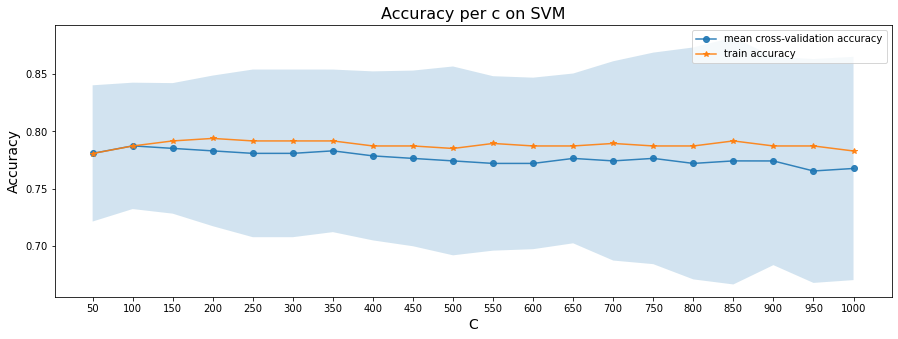

In [383]:
# function for plotting cross-validation results
def plot_cross_validation_on_c(c, cv_scores_mean, cv_scores_std, accuracy_scores, title):
    fig, ax = plt.subplots(1,1, figsize=(15,5))
    ax.plot(c, cv_scores_mean, '-o', label='mean cross-validation accuracy', alpha=0.9)
    ax.fill_between(c, cv_scores_mean-2*cv_scores_std, cv_scores_mean+2*cv_scores_std, alpha=0.2)
    ylim = plt.ylim()
    ax.plot(c, accuracy_scores, '-*', label='train accuracy', alpha=0.9)
    ax.set_title(title, fontsize=16)
    ax.set_xlabel('C', fontsize=14)
    ax.set_ylabel('Accuracy', fontsize=14)
    ax.set_ylim(ylim)
    ax.set_xticks(c)
    ax.legend()

# plotting accuracy
plot_cross_validation_on_c(c_list[1:], svm_cv_scores_mean, svm_cv_scores_std, svm_accuracy_scores, 
                               'Accuracy per c on SVM')

In [550]:
SVM_model_final = svm.SVC(kernel='linear', C= 100)
test_score = SVM_model_final.fit(inputs, target).score(inputs_test, target_test)
test_score

0.8041958041958042

* when c has the value of 100, it has the highest cv score of 0.787, test score is 0.804; it's not that accurate than the double parameter decision tree, but still better than the basic decision tree model. 

### 2.5 Missing Data, Imputation and Feature Engineering

Have you been paying close attention to your features? If not, now is a good time to start. Perform analysis that allows you to answer the following questions:
* Do any of your features have missing data? If so, which ones? What percent of observations have missing data?
* What happens to observations with missing data when you run the decision tree and SVM models above?
* Use one of the methods we discussed in class to impute missing values
* Are each of the features being appropriately included in the analysis?
* Find a way to engineer meaningful features from the "Name" and/or "Cabin" fields in the data.
* Rerun your decision tree and SVM on the new dataset with imputed missing values and the new features. What do you notice?

In [398]:
X_train_dt.shape

(456, 6)

In [588]:
df_imp = data_encoded.drop(['Pclass_1.0', 'Pclass_2.0', "Sex_female"], axis = 'columns')
df_imp

Survived  Pclass_3.0  Sex_male    Age  SibSp  Parch      Fare
0           0           1         1  22.00      1      0    7.2500
1           1           0         0  38.00      1      0   71.2833
2           1           1         0  26.00      0      0    7.9250
3           1           0         0  35.00      1      0   53.1000
4           0           1         1  35.00      0      0    8.0500
6           0           0         1  54.00      0      0   51.8625
7           0           1         1   2.00      3      1   21.0750
8           1           1         0  27.00      0      2   11.1333
9           1           0         0  14.00      1      0   30.0708
10          1           1         0   4.00      1      1   16.7000
11          1           0         0  58.00      0      0   26.5500
12          0           1         1  20.00      0      0    8.0500
13          0           1         1  39.00      1      5   31.2750
14          0           1         0  14.00      0      0    7.8542
15          1           0         0  55.00      0      0   16.0000
16          0           1         1   2.00      4      1   29.1250
18          0           1         0  31.00      1      0   18.0000
20          0           0         1  35.00      0      0   26.0000
21          1           0         1  34.00      0      0   13.0000
22          1           1         0  15.00      0      0    8.0292
23          1           0         1  28.00      0      0   35.5000
24          0           1         0   8.00      3      1   21.0750
25          1           1         0  38.00      1      5   31.3875
27          0           0         1  19.00      3      2  263.0000
30          0           0         1  40.00      0      0   27.7208
33          0           0         1  66.00      0      0   10.5000
34          0           0         1  28.00      1      0   82.1708
35          0           0         1  42.00      1      0   52.0000
37          0           1         1  21.00      0      0    8.0500
38          0           1         0  18.00      2      0   18.0000
39          1           1         0  14.00      1      0   11.2417
40          0           1         0  40.00      1      0    9.4750
41          0           0         0  27.00      1      0   21.0000
43          1           0         0   3.00      1      2   41.5792
44          1           1         0  19.00      0      0    7.8792
49          0           1         0  18.00      1      0   17.8000
50          0           1         1   7.00      4      1   39.6875
51          0           1         1  21.00      0      0    7.8000
52          1           0         0  49.00      1      0   76.7292
53          1           0         0  29.00      1      0   26.0000
54          0           0         1  65.00      0      1   61.9792
56          1           0         0  21.00      0      0   10.5000
57          0           1         1  28.50      0      0    7.2292
58          1           0         0   5.00      1      2   27.7500
59          0           1         1  11.00      5      2   46.9000
60          0           1         1  22.00      0      0    7.2292
61          1           0         0  38.00      0      0   80.0000
62          0           0         1  45.00      1      0   83.4750
63          0           1         1   4.00      3      2   27.9000
66          1           0         0  29.00      0      0   10.5000
67          0           1         1  19.00      0      0    8.1583
68          1           1         0  17.00      4      2    7.9250
69          0           1         1  26.00      2      0    8.6625
70          0           0         1  32.00      0      0   10.5000
71          0           1         0  16.00      5      2   46.9000
72          0           0         1  21.00      0      0   73.5000
73          0           1         1  26.00      1      0   14.4542
74          1           1         1  32.00      0      0   56.4958
75          0           1         1  25.00      0   

In [587]:
from sklearn.preprocessing import normalize 
df_imp_norm = normalize(df_imp[['Age', 'Fare','SibSp','Parch']], norm='l2')

df_imp_norm = pd.DataFrame(df_imp_norm, columns=['Age_n', 'Fare_n','SibSp_n','Parch_n']) 
df_imp_norm

Age_n    Fare_n   SibSp_n   Parch_n
0    0.948873  0.312697  0.043131  0.000000
1    0.470381  0.882377  0.012378  0.000000
2    0.956551  0.291564  0.000000  0.000000
3    0.550270  0.834839  0.015722  0.000000
4    0.974555  0.224148  0.000000  0.000000
5    0.721237  0.692688  0.000000  0.000000
6    0.093438  0.984603  0.140157  0.046719
7    0.922329  0.380317  0.000000  0.068321
8    0.421876  0.906153  0.030134  0.000000
9    0.232147  0.969212  0.058037  0.058037
10   0.909263  0.416223  0.000000  0.000000
11   0.927675  0.373389  0.000000  0.000000
12   0.776110  0.622380  0.019900  0.099501
13   0.872129  0.489277  0.000000  0.000000
14   0.960195  0.279330  0.000000  0.000000
15   0.067835  0.987847  0.135670  0.033917
16   0.864453  0.501940  0.027886  0.000000
17   0.802744  0.596324  0.000000  0.000000
18   0.934052  0.357137  0.000000  0.000000
19   0.881639  0.471924  0.000000  0.000000
20   0.619286  0.785166  0.000000  0.000000
21   0.351447  0.925843  0.131793  0.043931
22   0.766906  0.633455  0.020182  0.100909
23   0.072049  0.997307  0.011376  0.007584
24   0.821918  0.569606  0.000000  0.000000
25   0.987580  0.157115  0.000000  0.000000
26   0.322521  0.946492  0.011519  0.000000
27   0.628267  0.777854  0.014959  0.000000
28   0.933746  0.357936  0.000000  0.000000
29   0.704934  0.704934  0.078326  0.000000
30   0.778528  0.625141  0.055609  0.000000
31   0.972785  0.230429  0.024320  0.000000
32   0.789015  0.613678  0.029223  0.000000
33   0.071861  0.995975  0.023954  0.047907
34   0.923722  0.383063  0.000000  0.000000
35   0.710492  0.702598  0.039472  0.000000
36   0.172795  0.979685  0.098740  0.024685
37   0.937425  0.348187  0.000000  0.000000
38   0.538190  0.842752  0.010983  0.000000
39   0.744324  0.667325  0.025666  0.000000
40   0.723679  0.690047  0.000000  0.011134
41   0.894427  0.447214  0.000000  0.000000
42   0.969303  0.245870  0.000000  0.000000
43   0.176770  0.981072  0.035354  0.070708
44   0.226932  0.967553  0.103151  0.041260
45   0.950024  0.312178  0.000000  0.000000
46   0.429057  0.903278  0.000000  0.000000
47   0.474498  0.880194  0.010544  0.000000
48   0.140771  0.981877  0.105578  0.070385
49   0.940266  0.340441  0.000000  0.000000
50   0.918874  0.394550  0.000000  0.000000
51   0.881639  0.410999  0.207445  0.103722
52   0.946213  0.315253  0.072786  0.000000
53   0.950157  0.311770  0.000000  0.000000
54   0.320990  0.940901  0.100309  0.040124
55   0.274721  0.961524  0.000000  0.000000
56   0.873525  0.485619  0.033597  0.000000
57   0.492846  0.870117  0.000000  0.000000
58   0.956233  0.292607  0.000000  0.000000
59   0.028541  0.997224  0.000000  0.068774
60   0.923350  0.383960  0.000000  0.000000
61   0.925547  0.378633  0.000000  0.000000
62   0.950309  0.311308  0.000000  0.000000
63   0.511003  0.859579  0.000000  0.000000
64   0.850798  0.525493  0.000000  0.000000
65   0.898405  0.431507  0.081673  0.000000
66   0.420523  0.903467  0.026283  0.078848
67   0.087112  0.996105  0.011362  0.007575
68   0.948089  0.318005  0.000000  0.000000
69   0.963565  0.267472  0.000000  0.000000
70   0.930798  0.365534  0.000000  0.000000
71   0.600941  0.799186  0.013064  0.000000
72   0.782391  0.619142  0.030092  0.060184
73   0.992535  0.121964  0.000000  0.000000
74   0.898668  0.438629  0.000000  0.000000
75   0.341189  0.939877  0.000000  0.014834
76   0.828038  0.560143  0.000000  0.024354
77   0.794141  0.607284  0.023357  0.000000
78   0.962464  0.271408  0.000000  0.000000
79   0.262186  0.964937  0.000000  0.012485
80   0.967291  0.253671  0.000000  0.000000
81   0.976459  0.209147  0.052782  0.000000
82   0.962464  0.271408  0.000000  0.000000
83   0.939597  0.342282  0.000000  0.000000
84   0.979088  0.203439  0.000000  0.000000
85   0.670540  0.741874  0.000000  0.000000
86   0.707381  0.705147  0.048785  0.000000
87   0.939106  0.343627  0.000000  0.000000
88   0.896644  0.440476  0.044832  0.000000
89   0.761756  0.647864  0.000000  0.000000
90  

In [590]:
df_imp_norm_full = df_imp[['Survived','Pclass_3.0', 'Sex_male']].join(df_imp_norm)
df_imp_norm_full

Survived  Pclass_3.0  Sex_male     Age_n    Fare_n   SibSp_n   Parch_n
0           0           1         1  0.948873  0.312697  0.043131  0.000000
1           1           0         0  0.470381  0.882377  0.012378  0.000000
2           1           1         0  0.956551  0.291564  0.000000  0.000000
3           1           0         0  0.550270  0.834839  0.015722  0.000000
4           0           1         1  0.974555  0.224148  0.000000  0.000000
6           0           0         1  0.093438  0.984603  0.140157  0.046719
7           0           1         1  0.922329  0.380317  0.000000  0.068321
8           1           1         0  0.421876  0.906153  0.030134  0.000000
9           1           0         0  0.232147  0.969212  0.058037  0.058037
10          1           1         0  0.909263  0.416223  0.000000  0.000000
11          1           0         0  0.927675  0.373389  0.000000  0.000000
12          0           1         1  0.776110  0.622380  0.019900  0.099501
13          0           1         1  0.872129  0.489277  0.000000  0.000000
14          0           1         0  0.960195  0.279330  0.000000  0.000000
15          1           0         0  0.067835  0.987847  0.135670  0.033917
16          0           1         1  0.864453  0.501940  0.027886  0.000000
18          0           1         0  0.934052  0.357137  0.000000  0.000000
20          0           0         1  0.619286  0.785166  0.000000  0.000000
21          1           0         1  0.351447  0.925843  0.131793  0.043931
22          1           1         0  0.766906  0.633455  0.020182  0.100909
23          1           0         1  0.072049  0.997307  0.011376  0.007584
24          0           1         0  0.821918  0.569606  0.000000  0.000000
25          1           1         0  0.987580  0.157115  0.000000  0.000000
27          0           0         1  0.628267  0.777854  0.014959  0.000000
30          0           0         1  0.778528  0.625141  0.055609  0.000000
33          0           0         1  0.071861  0.995975  0.023954  0.047907
34          0           0         1  0.923722  0.383063  0.000000  0.000000
35          0           0         1  0.710492  0.702598  0.039472  0.000000
37          0           1         1  0.937425  0.348187  0.000000  0.000000
38          0           1         0  0.538190  0.842752  0.010983  0.000000
39          1           1         0  0.744324  0.667325  0.025666  0.000000
40          0           1         0  0.723679  0.690047  0.000000  0.011134
41          0           0         0  0.894427  0.447214  0.000000  0.000000
43          1           0         0  0.176770  0.981072  0.035354  0.070708
44          1           1         0  0.226932  0.967553  0.103151  0.041260
49          0           1         0  0.940266  0.340441  0.000000  0.000000
50          0           1         1  0.918874  0.394550  0.000000  0.000000
51          0           1         1  0.881639  0.410999  0.207445  0.103722
52          1           0         0  0.946213  0.315253  0.072786  0.000000
53          1           0         0  0.950157  0.311770  0.000000  0.000000
54          0           0         1  0.320990  0.940901  0.100309  0.040124
56          1           0         0  0.873525  0.485619  0.033597  0.000000
57          0           1         1  0.492846  0.870117  0.000000  0.000000
58          1           0         0  0.956233  0.292607  0.000000  0.000000
59          0           1         1  0.028541  0.997224  0.000000  0.068774
60          0           1         1  0.923350  0.383960  0.000000  0.000000
61          1           0         0  0.925547  0.378633  0.000000  0.000000
62          0           0         1  0.950309  0.311308  0.000000  0.000000
63          0           1         1  0.511003  0.859579  0.000000  0.000000
66          1           0         0  0.420523  0.903467  0.026283  0.078848
67          0           1         1  0.087112  0.996105  0.011362  0.007575
68          1           1         0  0.948089  0.3180

In [598]:
#drop na 
df_imp_norm_nna = df_imp_norm_full.dropna()

In [591]:
col = df_imp_norm_full.columns
col

Index(['Survived', 'Pclass_3.0', 'Sex_male', 'Age_n', 'Fare_n', 'SibSp_n',
       'Parch_n'],
      dtype='object')

In [592]:
from sklearn.impute import SimpleImputer

imp = SimpleImputer(missing_values=np.nan, strategy='mean')

full_val = imp.fit_transform(df_imp_norm_full)

In [593]:
full_df_norm = pd.DataFrame(full_val, columns=col) 
full_df_norm

Survived  Pclass_3.0  Sex_male     Age_n    Fare_n   SibSp_n   Parch_n
0         0.0         1.0       1.0  0.948873  0.312697  0.043131  0.000000
1         1.0         0.0       0.0  0.470381  0.882377  0.012378  0.000000
2         1.0         1.0       0.0  0.956551  0.291564  0.000000  0.000000
3         1.0         0.0       0.0  0.550270  0.834839  0.015722  0.000000
4         0.0         1.0       1.0  0.974555  0.224148  0.000000  0.000000
5         0.0         0.0       1.0  0.093438  0.984603  0.140157  0.046719
6         0.0         1.0       1.0  0.922329  0.380317  0.000000  0.068321
7         1.0         1.0       0.0  0.421876  0.906153  0.030134  0.000000
8         1.0         0.0       0.0  0.232147  0.969212  0.058037  0.058037
9         1.0         1.0       0.0  0.909263  0.416223  0.000000  0.000000
10        1.0         0.0       0.0  0.927675  0.373389  0.000000  0.000000
11        0.0         1.0       1.0  0.776110  0.622380  0.019900  0.099501
12        0.0         1.0       1.0  0.872129  0.489277  0.000000  0.000000
13        0.0         1.0       0.0  0.960195  0.279330  0.000000  0.000000
14        1.0         0.0       0.0  0.067835  0.987847  0.135670  0.033917
15        0.0         1.0       1.0  0.864453  0.501940  0.027886  0.000000
16        0.0         1.0       0.0  0.934052  0.357137  0.000000  0.000000
17        0.0         0.0       1.0  0.619286  0.785166  0.000000  0.000000
18        1.0         0.0       1.0  0.351447  0.925843  0.131793  0.043931
19        1.0         1.0       0.0  0.766906  0.633455  0.020182  0.100909
20        1.0         0.0       1.0  0.072049  0.997307  0.011376  0.007584
21        0.0         1.0       0.0  0.821918  0.569606  0.000000  0.000000
22        1.0         1.0       0.0  0.987580  0.157115  0.000000  0.000000
23        0.0         0.0       1.0  0.628267  0.777854  0.014959  0.000000
24        0.0         0.0       1.0  0.778528  0.625141  0.055609  0.000000
25        0.0         0.0       1.0  0.071861  0.995975  0.023954  0.047907
26        0.0         0.0       1.0  0.923722  0.383063  0.000000  0.000000
27        0.0         0.0       1.0  0.710492  0.702598  0.039472  0.000000
28        0.0         1.0       1.0  0.937425  0.348187  0.000000  0.000000
29        0.0         1.0       0.0  0.538190  0.842752  0.010983  0.000000
30        1.0         1.0       0.0  0.744324  0.667325  0.025666  0.000000
31        0.0         1.0       0.0  0.723679  0.690047  0.000000  0.011134
32        0.0         0.0       0.0  0.894427  0.447214  0.000000  0.000000
33        1.0         0.0       0.0  0.176770  0.981072  0.035354  0.070708
34        1.0         1.0       0.0  0.226932  0.967553  0.103151  0.041260
35        0.0         1.0       0.0  0.940266  0.340441  0.000000  0.000000
36        0.0         1.0       1.0  0.918874  0.394550  0.000000  0.000000
37        0.0         1.0       1.0  0.881639  0.410999  0.207445  0.103722
38        1.0         0.0       0.0  0.946213  0.315253  0.072786  0.000000
39        1.0         0.0       0.0  0.950157  0.311770  0.000000  0.000000
40        0.0         0.0       1.0  0.320990  0.940901  0.100309  0.040124
41        1.0         0.0       0.0  0.873525  0.485619  0.033597  0.000000
42        0.0         1.0       1.0  0.492846  0.870117  0.000000  0.000000
43        1.0         0.0       0.0  0.956233  0.292607  0.000000  0.000000
44        0.0         1.0       1.0  0.028541  0.997224  0.000000  0.068774
45        0.0         1.0       1.0  0.923350  0.383960  0.000000  0.000000
46        1.0         0.0       0.0  0.925547  0.378633  0.000000  0.000000
47        0.0         0.0       1.0  0.950309  0.311308  0.000000  0.000000
48        0.0         1.0       1.0  0.511003  0.859579  0.000000  0.000000
49        1.0         0.0       0.0  0.420523  0.903467  0.026283  0.078848
50        0.0         1.0       1.0  0.087112  0.996105  0.011362  0.007575
51        1.0         1.0       0.0  0.948089  0.3180

In [602]:
# split into inputs and target
target_norm = full_df_norm['Survived']
inputs_norm = full_df_norm.drop(['Survived'], axis = 'columns')

In [603]:
#split into train and validation set
X_train_imp, X_test_imp, y_train_imp, y_test_imp = train_test_split(inputs_norm, target_norm,  
    test_size=0.2, random_state=42)

In [604]:
test_score_imp = tree_model_final.fit(X_train_imp, y_train_imp).score(X_test_imp, y_test_imp)
test_score_imp

0.7762237762237763

In [605]:
cab = df_main['Cabin'].values
cab

array([nan, 'C85', nan, 'C123', nan, nan, 'E46', nan, nan, nan, 'G6',
       'C103', nan, nan, nan, nan, nan, nan, nan, nan, nan, 'D56', nan,
       'A6', nan, nan, nan, 'C23 C25 C27', nan, nan, nan, 'B78', nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, 'D33', nan, 'B30', 'C52', nan, nan, nan,
       nan, nan, 'B28', 'C83', nan, nan, nan, 'F33', nan, nan, nan, nan,
       nan, nan, nan, nan, 'F G73', nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, 'C23 C25 C27', nan, nan, nan, 'E31', nan,
       nan, nan, 'A5', 'D10 D12', nan, nan, nan, nan, 'D26', nan, nan,
       nan, nan, nan, nan, nan, 'C110', nan, nan, nan, nan, nan, nan, nan,
       'B58 B60', nan, nan, nan, nan, 'E101', 'D26', nan, nan, nan,
       'F E69', nan, nan, nan, nan, nan, nan, nan, 'D47', 'C123', nan,
       'B86', nan, nan, nan, nan, nan, nan, nan, nan, 'F2', nan, nan,
       'C2', nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, na

* Do any of your features have missing data? If so, which ones? 
    - Age has missing data
- What percent of observations have missing data?
    - (null)/total 


* What happens to observations with missing data when you run the decision tree and SVM models above?
    - lmao I dropped all the missing data... 

* Use one of the methods we discussed in class to impute missing values
    - shuold I just drop it or fill it with mean value

* Are each of the features being appropriately included in the analysis?
    - there're categorical data and continuous data;
    - categorical: sex, pclass
    - continuouse data: fare, age, SibSp, Parch; they can be normalized

* Find a way to engineer meaningful features from the "Name" and/or "Cabin" fields in the data.
    - Cabin column can be usefu if we get the letter class and transform it in to a categorical feature. 

* Rerun your decision tree and SVM on the new dataset with imputed missing values and the new features. What do you notice?
    - 

## Part 3: Many Trees

### 3.1: Random Forest
Use the [random forest classifier](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) to predict survival on the titanic. Use cross-validation on the training data to choose the best hyper-parameters. 
* What hyperparameters did you select with cross-validation? You should use cross-validation to select all of the hyperparameters (i.e. search a grid of hyperparameters), and report the combination that maximizes cross-validated accuracy)
* How does the cross-validated performance (average across validation folds) compare to the test performance (using the top-performing, fitted model selected through cross-validation)?
* How does the RF performance compare to the decision tree and SVM?
* Create a plot that shows how cross-validated performance (y-axis) relates to the number of trees in the forest (x-axis).

In [457]:
from sklearn.ensemble import RandomForestClassifier
#hyperparameters that will be select for cross-validation 
k = 7
num_tree = 100
leaf = 1
split = 2

clf = RandomForestClassifier(criterion='entropy', max_depth=k, n_estimators = num_tree, min_samples_leaf = leaf, min_samples_split = split,random_state = 42)
# params: n_estimators=100 (number of trees in the forest), criterion (entropy),
# max_features how many features at each split defualt max_features=sqrt(n_features)
clf.fit(X_train_dt, y_train_dt)
predict_labels = clf.predict(X_val_dt)
print("Accuracy of decision tree is {}".format(sum(predict_labels==y_val_dt)/len(y_val_dt)))


Accuracy of decision tree is 0.7913043478260869


In [458]:
#Using gridSeach for the best feature combination 
from sklearn.model_selection import GridSearchCV

parameters = {'max_depth':range(3,10), 'n_estimators':range(10,100), 'min_samples_leaf':range(1,5),'min_samples_split':range(2,5)}
clf = GridSearchCV(RandomForestClassifier(random_state = 42), parameters, n_jobs=4)
clf.fit(X_train_dt, y_train_dt)
tree_model = clf.best_estimator_
print (clf.best_score_, clf.best_params_) 

0.8531055900621117 {'max_depth': 10, 'min_samples_leaf': 3, 'min_samples_split': 4, 'n_estimators': 83}


In [474]:
# function for fitting trees of various depths on the training data using cross-validation
def cross_validation_on_RF(X, y, num_tree, cv=5, scoring='accuracy'):
    cv_scores_list = []
    cv_scores_std = []
    cv_scores_mean = []
    accuracy_scores = []
    
    for tree in num_tree:
        model = RandomForestClassifier(criterion='entropy', max_depth= 10, n_estimators = tree, min_samples_leaf = 3, min_samples_split = 4,random_state = 42)
        cv_scores = cross_val_score(model, X, y, cv=cv, scoring=scoring)
        cv_scores_list.append(cv_scores)
        cv_scores_mean.append(cv_scores.mean())
        cv_scores_std.append(cv_scores.std())
        accuracy_scores.append(model.fit(X, y).score(X, y))
        
    cv_scores_mean = np.array(cv_scores_mean)
    cv_scores_std = np.array(cv_scores_std)
    accuracy_scores = np.array(accuracy_scores)
    
    return cv_scores_mean, cv_scores_std, accuracy_scores


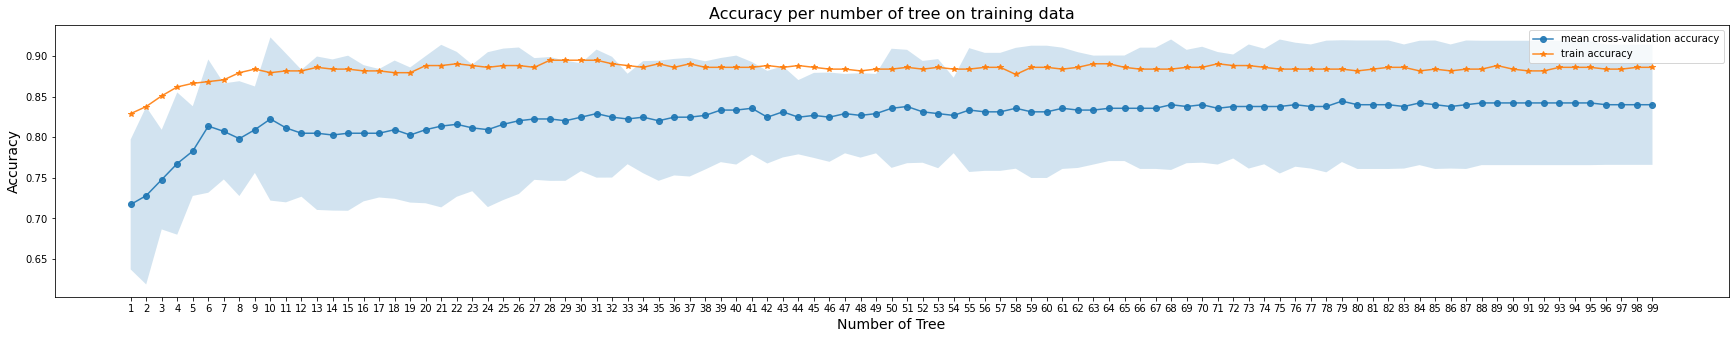

In [475]:
# function for plotting cross-validation results
def plot_cross_validation_on_RF(num_tree, cv_scores_mean, cv_scores_std, accuracy_scores, title):
    fig, ax = plt.subplots(1,1, figsize=(30,5))
    ax.plot(num_tree, cv_scores_mean, '-o', label='mean cross-validation accuracy', alpha=0.9)
    ax.fill_between(num_tree, cv_scores_mean-2*cv_scores_std, cv_scores_mean+2*cv_scores_std, alpha=0.2)
    ylim = plt.ylim()
    ax.plot(num_tree, accuracy_scores, '-*', label='train accuracy', alpha=0.9)
    ax.set_title(title, fontsize=16)
    ax.set_xlabel('Number of Tree', fontsize=14)
    ax.set_ylabel('Accuracy', fontsize=14)
    ax.set_ylim(ylim)
    ax.set_xticks(num_tree)
    ax.legend()

# fitting trees of depth 1 to 24
num_tree = range(1,100)
rf_cv_scores_mean, rf_cv_scores_std, rf_accuracy_scores = cross_validation_on_RF(X_train_dt, y_train_dt, num_tree)

# plotting accuracy
plot_cross_validation_on_RF(num_tree, rf_cv_scores_mean, rf_cv_scores_std, rf_accuracy_scores, 
                               'Accuracy per number of tree on training data')

In [480]:
print("Average Cross_validation score is: ", rf_cv_scores_mean.mean())

Average Cross_validation score is:  0.8244535657579137


In [552]:
#Best hyperparameters 
k = 10
num_tree = 83
leaf = 3
split = 4

clf_best = RandomForestClassifier(criterion='entropy', max_depth=k, n_estimators = num_tree, min_samples_leaf = leaf, min_samples_split = split, random_state = 42)
# params: n_estimators=100 (number of trees in the forest), criterion (entropy),
# max_features how many features at each split defualt max_features=sqrt(n_features)
clf_best.fit(inputs, target)
predict_labels = clf_best.predict(inputs_test)
print("Test Accuracy of decision tree is {}".format(sum(predict_labels==target_test)/len(target_test)))

Test Accuracy of decision tree is 0.8741258741258742


* Hyperparameters: k/max_depth; n_estimatores/number of trees, min_split_leaves, min_splits 
* How does the cross-validated performance (average across validation folds) compare to the test performance (using the top-performing, fitted model selected through cross-validation)?
    - The CV with the set of best feature has average cv score of 0.82, the test performance has a accuracy score of 0.874.
* How does the RF performance compare to the decision tree and SVM?
    - the RF performance is  better comparing to the decision tree and SVM

### 3.2: Gradient Boosting

Use the [Gradient Boosting classifier](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html) to predict survival on the Titanic. Tune your hyperparameters. Again, you should tune more parameteres than just `max_depth`
* How does the GBM performance compare to the other models?
* Create a figure showing the feature importances in your final model (with properly tuned hyperparameters)


In [428]:
from sklearn.ensemble import GradientBoostingClassifier

In [429]:
lr_list = [0.05, 0.075, 0.1, 0.25, 0.5, 0.75, 1]

for learning_rate in lr_list:
    gb_clf = GradientBoostingClassifier(n_estimators=20, learning_rate=learning_rate, max_features=2, max_depth=2, random_state=0)
    gb_clf.fit(X_train_dt, y_train_dt)

    print("Learning rate: ", learning_rate)
    print("Accuracy score (training): {0:.3f}".format(gb_clf.score(X_train_dt, y_train_dt)))
    print("Accuracy score (validation): {0:.3f}".format(gb_clf.score(X_val_dt, y_val_dt)))

Learning rate:  0.05
Accuracy score (training): 0.809
Accuracy score (validation): 0.791
Learning rate:  0.075
Accuracy score (training): 0.809
Accuracy score (validation): 0.783
Learning rate:  0.1
Accuracy score (training): 0.818
Accuracy score (validation): 0.791
Learning rate:  0.25
Accuracy score (training): 0.829
Accuracy score (validation): 0.765
Learning rate:  0.5
Accuracy score (training): 0.862
Accuracy score (validation): 0.783
Learning rate:  0.75
Accuracy score (training): 0.862
Accuracy score (validation): 0.783
Learning rate:  1
Accuracy score (training): 0.866
Accuracy score (validation): 0.783


In [462]:
parameters = {'learning_rate':np.arange(0.025, 2, 0.025), 'n_estimators':range(1,20), 'max_features':range(1,5),'max_depth':range(2,5)}
#GridSearch for best feature combination
gb_clf = GridSearchCV(GradientBoostingClassifier(), parameters, n_jobs=4)
gb_clf.fit(X_train_dt, y_train_dt)

print("Accuracy score (training): {0:.3f}".format(gb_clf.score(X_train_dt, y_train_dt)))
print("Accuracy score (validation): {0:.3f}".format(gb_clf.score(X_val_dt, y_val_dt)))
print (gb_clf.best_score_, gb_clf.best_params_) 

Accuracy score (training): 0.877
Accuracy score (validation): 0.774
0.8377448638318203 {'learning_rate': 0.125, 'max_depth': 4, 'max_features': 2, 'n_estimators': 17}


In [554]:
from sklearn.metrics import classification_report, confusion_matrix
#best feature combination 
gb_clf2 = GradientBoostingClassifier(n_estimators=17, learning_rate=0.125, max_features=2, max_depth=4, random_state=42)
gb_clf2.fit(inputs, target)
predictions = gb_clf2.predict(inputs_test)

print("Confusion Matrix:")
print(confusion_matrix(target_test, predictions))

print("Classification Report")
print(classification_report(target_test, predictions))

Confusion Matrix:
[[81  6]
 [14 42]]
Classification Report
              precision    recall  f1-score   support

           0       0.85      0.93      0.89        87
           1       0.88      0.75      0.81        56

    accuracy                           0.86       143
   macro avg       0.86      0.84      0.85       143
weighted avg       0.86      0.86      0.86       143



* Performance: the best training score for GB is: 0.8377448638318203; whereas it has a test score of 0.85.


### 3.3 Putting it all together!

Create a final table that summarizes the performance of your models as follows:

| Model | Cross-validated Performance   | Test Performance | 
|------|------|------|
|   Decision Tree        |0.82  |0.832  |
|   Decision Tree (with imputed missing values and new features)        |  |  |
|   SVM  |0.787  |0.804  |
|   SVM (with imputed missing values and new features)        |  |  |
|   Random Forest        |0.82  |0.874  |
|   Random Forest (with imputed missing values and new features)        |  |  |
|   Gradient Boosting    |0.837  |0.85  | 
|   Gradient Boosting (with imputed missing values and new features)        |  |    |

*Enter your observations here*

## Part 4: Neural Networks

Carry on the classification you did in parts 2.1 and 2.4 by using feed forward neural networks.
You are responsible for choosing the number of layers, their corresponding size, the activation functions and the choice of gradient descent algorithm (and its parameters e.g. learning rate). Pick those parameters by hand. For some of them you can also perform cross-validation if you wish. Your goal is to tune those parameters so that your test accuracy is atleast above 75%. Make sure you process your data appropriately before training your networks.

* Report your accuracy on the test set along with your choice of parameters. More specifically, report the number of layers, their size, the activation functions and your choice of optimization algorithm. 

It is a good exercise to experiment with different optimizers (gradient descent, stochastic gradient descent, AdaGrad etc), learning rates, batch sizes etc. to get a feeling of how they affect neural network training.

In [606]:
import tensorflow.compat.v1 as tf
tf.compat.v1.disable_eager_execution()

tf.Session()

## Initialize Training Parameters
learning_rate = 0.1
num_steps = 4
batch_size = 10
EPOCHS = 10

# Neural Network Parameters
n_hidden_1 = 80 # 1st layer number of neurons
num_input = 2 # Spiral data input 2-D points
num_classes = 2 # Total classes (red or black)

# tf Graph input
X = tf.placeholder("float", [None, num_input])
Y = tf.placeholder("float", [None, num_classes])

In [607]:
## Initialize Layer Weights
# Store layers weight & bias
weights = {
    'w1': tf.Variable(tf.random_normal([num_input, n_hidden_1])),
    'out': tf.Variable(tf.random_normal([n_hidden_1, num_classes]))
}
biases = {
    'b1': tf.Variable(tf.random_normal([n_hidden_1])),
    'out': tf.Variable(tf.random_normal([num_classes]))
}

## Create model
def neural_net(x):
    # Hidden fully connected layer. You can use different activation functions here apart from tanh. 
    layer_1 = tf.nn.tanh(tf.add(tf.matmul(x, weights['w1']), biases['b1']))
    # Output fully connected layer with a neuron for each class
    out_layer = tf.matmul(layer_1, weights['out']) + biases['out']
    return out_layer

In [608]:
## Construct model
logits = neural_net(X)

# Define loss
loss_op = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=Y))

# Set the optimizer as Adam. Adam optimizer is a SGD method that is based on adaptive estimation 
# of first-order and second-order moments. This is the most commonly used one in DL. There are many more optimizers out there. 
# Refer to this for more information - https://www.tensorflow.org/versions/r1.15/api_docs/python/tf/keras/optimizers
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate) 
train_op = optimizer.minimize(loss_op)

# Evaluate model
correct_pred = tf.equal(tf.argmax(logits, 1), tf.argmax(Y, 1))
#accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))# cast to new data type


In [611]:
# Initialize the variables (i.e. assign their default value)
init = tf.global_variables_initializer()


## Start training
sess=tf.Session()
test_acc = []
train_acc = []

# Run the initializer
sess.run(init)
for kk in range(1,EPOCHS):
    for step in range(1, num_steps+1):
        batch_x, batch_y = X_train_dt[(batch_size)*(step-1)+1:batch_size*(step)],y_train_dt[(batch_size)*(step-1)+1:batch_size*(step)]  #mnist.train.next_batch(batch_size)
        # Run optimization (backprop)
        sess.run(train_op, feed_dict={X: batch_x, Y: batch_y})

    loss = sess.run(loss_op, feed_dict={X: X_train_dt, Y: y_train_dt})
    print("Epoch " + str(kk) + ", Training Loss= " + "{:.4f}".format(loss))
    acc_train = sess.run(correct_pred, feed_dict={X: X_train_dt, Y: y_train_dt})
    acc_train = np.sum(acc_train)/len(acc_train)
    train_acc.append(acc_train)
    print("Training Accuracy=" + str(acc_train))
    acc_test = sess.run(correct_pred, feed_dict={X: X_val_dt, Y: y_val_dt})
    acc_test = np.sum(acc_test)/len(acc_test)
    test_acc.append(acc_test)
    print("Test Accuracy=" + str(acc_test))


ValueError: Cannot feed value of shape (9, 6) for Tensor 'Placeholder_4:0', which has shape '(None, 2)'

In [613]:
X = inputs
W0 = sess.run(weights)['w1']
B0 = sess.run(biases)['b1']
W1 = sess.run(weights)['out']
B1 = sess.run(biases)['out']
def neural_net_plot(X, W0, W1, B0, B1):
    # Hidden fully connected layer 
    layer_1 = np.maximum(np.matmul(X, W0) + B0, 0)
    # Output fully connected layer with a neuron for each class
    logits = np.matmul(layer_1, W1) + B1
    out_layer = np.argmax(logits, 1)
    return out_layer

'''
# Helper function to plot a decision boundary.
def plot_decision_boundary(neural_net_plot, X, W0,W1, B0,B1, col):
    # Set min and max values and give it some padding
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    x_min = np.float32(x_min)
    x_max = np.float32(x_max)
    y_min = np.float32(y_min)
    y_max = np.float32(y_max)
    h = 0.1
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole gid
    xx = np.float32(xx)
    yy = np.float32(yy)
    Z = neural_net_plot(np.c_[xx.ravel(), yy.ravel()], W0,W1, B0,B1)
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.scatter(X[:, 0], X[:, 1], s=1.5, c=col)
    plt.show()


plot_decision_boundary(neural_net_plot, X, W0,W1, B0,B1, colors)'''

'\n# Helper function to plot a decision boundary.\ndef plot_decision_boundary(neural_net_plot, X, W0,W1, B0,B1, col):\n    # Set min and max values and give it some padding\n    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5\n    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5\n    x_min = np.float32(x_min)\n    x_max = np.float32(x_max)\n    y_min = np.float32(y_min)\n    y_max = np.float32(y_max)\n    h = 0.1\n    # Generate a grid of points with distance h between them\n    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))\n    # Predict the function value for the whole gid\n    xx = np.float32(xx)\n    yy = np.float32(yy)\n    Z = neural_net_plot(np.c_[xx.ravel(), yy.ravel()], W0,W1, B0,B1)\n    Z = Z.reshape(xx.shape)\n    # Plot the contour and training examples\n    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)\n    plt.scatter(X[:, 0], X[:, 1], s=1.5, c=col)\n    plt.show()\n\n\nplot_decision_boundary(neural_net_plot, X, W0,W1, B0,B1, col

*Enter your observations here*

## Part 5: (Extra credit) Flex your ML chops

Add additional rows to the table from 3.3 based on other models you've learned in class.
 - Which models perform the best, using the default parameters (i.e., no hyperparameter tuning)?
 - For which models does careful hyperparameter tuning make the biggest different? Why do you think that is the case?
 - Which tuned model has the largest gap between cross-validated performance and test performance? Why might that be?

In [ ]:
# enter your code here

*Enter your observations here*